<b>Case 4 - Millennium BCP
<br>Group H

<br>| Ana Teresa Maia | r20201562 |
<br>| Henrique Falcão | r20201519 |
<br>| Maria Benedita Elias | 20230491 |
<br>| Maria Leonor Gusmão | 20230488 |
<br>| Pedro  Carvalho | 20230487 |


<br>Business Cases for Data Science S2 2023/2024

This Dataset is to be applied for the Processes that just entered their 5th activity.

<a name="top"></a> 
## Notebook Dynamic Index

* [Requirements](#req)
* [General Imports and Setup](#libraries)
* [Dataset Load](#load)
* [Final Preprocessing](#prep)
* [Metric and Non-Metric Feature Split](#metric)
* [Metric and Non-Metric Feature Split](#metric)
* [Dataset Split (Train and Validation)](#split)
* [Normalization + Encoding](#encoding)
* [Balance Dataset](#smote)
* [Feature Selection](#select)
  * [Final Feature Selection](#selectfin)
* [Baseline Modeling](#base)
* [Model Tunning](#tun)
* [Models Feature Importance](#impot)
* [Train Metrics Comparison](#TRAIN)
* [Validation Implementation](#VAL)
* [Final Model Selection](#fin)
* [Final Model Interpretation](#int)

<a class="anchor" id="req">

### Requirements (packages and versions)
###### [Go back to Contents](#top)
</a>

In [273]:
import pkg_resources

#Get a list of installed packages and their versions
installed_packages = pkg_resources.working_set

#Print package names and versions
for package in installed_packages:
    print(package)

imbalanced-learn 0.12.2
imblearn 0.0
joblib 1.4.2
mlxtend 0.23.1
pillow 10.3.0
scikit-learn 1.3.2
Babel 2.11.0
Brotli 1.0.9
Jinja2 3.1.3
MarkupSafe 2.1.3
PyQt5 5.15.10
PyQt5-sip 12.13.0
PySocks 1.7.1
PyYAML 6.0.1
Pygments 2.15.1
QtPy 2.4.1
Send2Trash 1.8.2
anyio 4.2.0
argon2-cffi 21.3.0
argon2-cffi-bindings 21.2.0
asttokens 2.0.5
async-lru 2.0.4
attrs 23.1.0
backcall 0.2.0
beautifulsoup4 4.12.2
bleach 4.1.0
category-encoders 2.6.3
certifi 2024.2.2
cffi 1.16.0
charset-normalizer 2.0.4
colorama 0.4.6
comm 0.2.1
contourpy 1.1.1
cycler 0.12.1
debugpy 1.6.7
decorator 5.1.1
defusedxml 0.7.1
exceptiongroup 1.2.0
executing 0.8.3
fastjsonschema 2.16.2
fonttools 4.52.3
idna 3.7
importlib-metadata 7.0.1
importlib-resources 6.1.1
ipykernel 6.28.0
ipython 8.12.2
ipywidgets 8.1.2
jedi 0.18.1
json5 0.9.6
jsonschema 4.19.2
jsonschema-specifications 2023.7.1
jupyter 1.0.0
jupyter-client 8.6.0
jupyter-console 6.6.3
jupyter-core 5.5.0
jupyter-events 0.8.0
jupyter-lsp 2.2.0
jupyter-server 2.10.0
jupyter-s

<a class="anchor" id="libraries">

### General Imports and Setup
###### [Go back to Contents](#top)
</a>

In [274]:
# General imports
import pandas as pd
import numpy as np
from collections import Counter
import warnings

# For visualizations
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import math
import matplotlib.colors as mcolors

# For better resolution plots
%config InlineBackend.figure_format = 'retina' 

# Setting seaborn style
sns.set()

# To avoid too many warnings in graphs
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Balance dataset
from imblearn.combine import SMOTETomek

# Encoding
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier


<a class="anchor" id="load">

### Dataset Load
###### [Go back to Contents](#top)
</a>

The dataset we will work with under this notebook corresponds to the prefix extraction 5, where processes are entering the 5th activity.

In [275]:
dataset = pd.read_csv('processed_and_transformed_subset_5.csv')

In [276]:
dataset.head(5)

,Task arrival date_act1,Task arrival date_act2,Task arrival date_act3,Task arrival date_act4,Actvity ID_act1,Actvity ID_act2,Actvity ID_act3,Actvity ID_act4,Task Executer_act1,Task Executer_act2,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,Actvity ID_last_act5,Task arrival date_last_act5
0,2022-05-04 11:49:31.370,2022-05-04 11:49:31.900,2022-05-05 14:34:55.710,2022-05-05 14:53:22.673,100,102,101,102,54,4322,...,2,0,0,0,0,0,0,0,102,2022-05-05 15:37:46.887
1,2022-05-04 15:29:48.330,2022-05-04 15:29:48.817,2022-05-05 07:22:29.390,2022-05-05 09:03:01.953,100,102,101,102,1838,4322,...,0,0,0,0,1,0,0,0,102,2022-05-10 15:17:42.140
2,2022-05-27 10:03:41.910,2022-05-27 10:03:42.503,2022-05-27 10:58:07.363,2022-05-27 12:06:13.470,100,102,101,102,10434,4960,...,1,0,0,0,0,0,0,0,102,2022-05-27 12:29:26.733
3,2022-06-02 17:22:18.123,2022-06-02 17:22:20.200,2022-06-13 13:14:13.863,2022-06-19 16:40:53.143,100,102,102,101,10321,Robot,...,1,0,0,0,1,0,0,0,102,2022-06-20 08:57:28.310
4,2022-06-03 12:15:10.173,2022-06-03 12:15:12.253,2022-06-13 17:56:26.490,2022-06-21 04:30:33.733,100,102,102,101,8269,Robot,...,0,0,0,0,0,0,0,0,102,2022-06-21 08:21:18.443


In [277]:
# Get column names as a list
column_names = list(dataset.columns)

# Print each column name
for column in column_names:
    print(column)

Task arrival date_act1
Task arrival date_act2
Task arrival date_act3
Task arrival date_act4
Actvity ID_act1
Actvity ID_act2
Actvity ID_act3
Actvity ID_act4
Task Executer_act1
Task Executer_act2
Task Executer_act3
Task Executer_act4
Task executer department_act1
Task executer department_act2
Task executer department_act3
Task executer department_act4
Task Type_act1
Task Type_act2
Task Type_act3
Task Type_act4
Action_act1
Action_act2
Action_act3
Action_act4
idBPMApplicationAction_act1
idBPMApplicationAction_act2
idBPMApplicationAction_act3
idBPMApplicationAction_act4
Period between arrival and execution_act1
Period between arrival and execution_act2
Period between arrival and execution_act3
Period between arrival and execution_act4
Period between arrival and capture_act1
Period between arrival and capture_act2
Period between arrival and capture_act3
Period between arrival and capture_act4
Cumulative Length of Process_act1
Cumulative Length of Process_act2
Cumulative Length of Process_act

<a class="anchor" id="prep">

### Final preprocessing
###### [Go back to Contents](#top)
</a>

#### Extraction of relevant information

Since columns such as date columns can be too specific to each process, it tends to lead to overfit, as we could see on the Modelling phase. To go around this we will make an extraction of the month day and hour of each process when it entered each activity, reducing this way the danger of overfitting later on.

In [278]:
#List of task arrival date columns
task_arrival_columns = [col for col in dataset.columns if col.startswith('Task arrival date')]

for col in task_arrival_columns:
    #Convert to datetime
    dataset[col] = pd.to_datetime(dataset[col])
    
    #Extract the activity identifier (e.g., act1, act2, last_act3)
    act_identifier = col.split('_')[-1]
    
    #Extract year, month, day, and hour
    dataset[f'Month_{act_identifier}'] = dataset[col].dt.month
    dataset[f'Hour_{act_identifier}'] = dataset[col].dt.hour
    dataset[f'Day_{act_identifier}'] = dataset[col].dt.day

#Drop the original Task arrival date columns
dataset.drop(columns=task_arrival_columns, inplace=True)

#Display the resulting DataFrame
dataset.head()

,Actvity ID_act1,Actvity ID_act2,Actvity ID_act3,Actvity ID_act4,Task Executer_act1,Task Executer_act2,Task Executer_act3,Task Executer_act4,Task executer department_act1,Task executer department_act2,...,Day_act2,Month_act3,Hour_act3,Day_act3,Month_act4,Hour_act4,Day_act4,Month_act5,Hour_act5,Day_act5
0,100,102,101,102,54,4322,54,Robot,54,4322,...,4,5,14,5,5,14,5,5,15,5
1,100,102,101,102,1838,4322,1838,4960,1838,4322,...,4,5,7,5,5,9,5,5,15,10
2,100,102,101,102,10434,4960,10434,Robot,10434,4960,...,27,5,10,27,5,12,27,5,12,27
3,100,102,102,101,10321,Robot,4322,10321,10321,Non identifiable,...,2,6,13,13,6,16,19,6,8,20
4,100,102,102,101,8269,Robot,4322,8269,8269,Non identifiable,...,3,6,17,13,6,4,21,6,8,21


We also noticed that datatypes no longer are correctly representing each feature type. As so we corrected them:

In [279]:
# Set pandas to display all columns in info
pd.set_option('display.max_info_columns', 100)  # Adjust number as needed

# Display detailed info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Columns: 101 entries, Actvity ID_act1 to Day_act5
dtypes: int32(15), int64(66), object(20)
memory usage: 1.1+ MB


In [280]:
#List of prefixes to match columns
prefixes = ['idField', 'Actvity ID', 'idBPMApplicationAction', 'Role ID', 'Actvity ID_last', 'Month', 'Hour', 'Day']

#Identifying columns to convert
columns_to_convert = [col for col in dataset.columns if any(col.startswith(prefix) for prefix in prefixes)]

#Converting the specified columns to 'object' type
dataset[columns_to_convert] = dataset[columns_to_convert].astype('object')

Datatypes are correct:

In [281]:
#Set pandas to display all columns in info
pd.set_option('display.max_info_columns', 100)  # Adjust number as needed

#Display detailed info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Columns: 101 entries, Actvity ID_act1 to Day_act5
dtypes: int64(42), object(59)
memory usage: 1.2+ MB


In [282]:
#These copies are made to ensure safety to comeback later on if any undesired change was performed.
final_df=dataset.copy()

In [283]:
#To unsure we dont have any strange value we will check the variables unique values 
for column in final_df.columns:
    unique_values = final_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()  

Unique values in column 'Actvity ID_act1':
[100]

Unique values in column 'Actvity ID_act2':
[102 105]

Unique values in column 'Actvity ID_act3':
[101 102 103 108 104 106]

Unique values in column 'Actvity ID_act4':
[102 101 104 103 107 106]

Unique values in column 'Task Executer_act1':
['54' '1838' '10434' '10321' '8269' '8673' '9342' '2059' '850' '447'
 '8559' '126' '1787' '10771' '10676' '11354' '137' '180' '7186' '9090'
 '10784' '1054' '1630' '7588' '10683' '47' '10184' '8193' '946' '10976'
 '11115' '84' '1853' '8004' '7474' '893' '600' '11251' '7230' '672'
 'Robot' '10635' '11136' '362' '171' '9522' '10473' '92' '571' '11333'
 '10650' '9373' '10269' '57' '8445' '397' '11058' '9512' '9786' '334'
 '309' '8262' '1026' '10493' '11055' '10053' '10919' '11091' '10718'
 '8048' '10285' '10907' '8608' '7284' '10993' '1182' '10930' '9780'
 '10929' '9303' '950' '11011' '8687' '730' '10054' '747' '9133' '358'
 '11299' '20' '1119' '10799' '1001' '755' '7718' '7425' '924' '307' '8987'
 '1002'

All values are logically fine.

<a class="anchor" id="metric">

### Metric and Non-Metric Feature Split
###### [Go back to Contents](#top)
</a>

In [284]:
#Extracting metric and non-metric features 

#List to store metric features
metric_features = []

#List to store non-metric features
non_metric_features = []

#Iterate through columns 
for column in final_df.columns:
    if column != 'Target':  #Exclude the target column
        if column.startswith(('Period between arrival and execution', 
                              'Period between arrival and capture',   
                              'Overdue Days', 
                              'Age', 
                              'Years in Org Position',
                              'NumberOfFemales',
                              'NumberOfManagers',
                              'NumberOfOutsourcers',
                              'NumberOfRejections',
                              'Value',
                              'Cumulative Length of Process')):
            metric_features.append(column)
        else:
            non_metric_features.append(column)

In [285]:
#Print the lists of metric and non-metric features
print("Metric Features:")
for feature in metric_features:
    print(feature)

print("\nNon-Metric Features:")
for feature in non_metric_features:
    print(feature)

Metric Features:
Period between arrival and execution_act1
Period between arrival and execution_act2
Period between arrival and execution_act3
Period between arrival and execution_act4
Period between arrival and capture_act1
Period between arrival and capture_act2
Period between arrival and capture_act3
Period between arrival and capture_act4
Cumulative Length of Process_act1
Cumulative Length of Process_act2
Cumulative Length of Process_act3
Cumulative Length of Process_act4
Overdue Days_act1
Overdue Days_act2
Overdue Days_act3
Overdue Days_act4
Years in Org Position_act1
Years in Org Position_act2
Years in Org Position_act3
Years in Org Position_act4
Age_act1
Age_act2
Age_act3
Age_act4
NumberOfFemales
NumberOfManagers
NumberOfOutsourcers
NumberOfRejections
Value Count
Value_10
Value_50
Value_30
Value_70
Value_20
Value_100
Value_60
Value_2
Value_40
Value_1
Value_80
Value_90

Non-Metric Features:
Actvity ID_act1
Actvity ID_act2
Actvity ID_act3
Actvity ID_act4
Task Executer_act1
Task Ex

In [286]:
#List with all column names from final_df to latter use this columns to normalize them
all_features = final_df.columns.tolist()
all_features.remove('Target')

<a class="anchor" id="split">

### Dataset Split (Train and Validation)
###### [Go back to Contents](#top)
</a>

In order to evaluate our work with relevant metrics, we did the train-val split. Since we dont have that many examples (processes) we decided to use cross validation further ahead to go over the fact of not having a separate test set and yet try to achieve accurate results.

In [287]:
data_split = final_df.copy()

In [288]:
X = data_split.drop('Target', axis = 1)
target_multiclass = data_split['Target']

We are setting the stratify parameter to ensure that the target classes mantain the same distribution for the train and validation dataset

In [289]:
#Split the data into train and validation
#20% of the dataset was allocated to the validation set 

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  target_multiclass,
                                                  test_size = 0.2,
                                                  random_state = 42,
                                                  stratify = target_multiclass,
                                                  shuffle = True)

Now we can see that our dataset is imbalanced, meaning that we have target classes with much more examples associated to it than others. Target variable 3 has 46% of represantation in the entire dataset. Latter we will apply techniques to try to overcome this problem to still have a good predictive performance accross all possible outcomes. 

In [290]:
#Get the percentage of each target value in the train dataset
percentage_per_class = y_train.value_counts(normalize=True) * 100

#Display the percentage of each target value
print("Percentage of each target value in the train dataset:")
print(percentage_per_class)

Percentage of each target value in the train dataset:
Target
3    45.822994
1    26.302730
2    23.490488
0     4.383788
Name: proportion, dtype: float64


In [291]:
y_train.value_counts()

Target
3    554
1    318
2    284
0     53
Name: count, dtype: int64

In [292]:
#Get the percentage of each target value in the val dataset
percentage_per_class = y_val.value_counts(normalize=True) * 100

#Display the percentage of each target value
print("Percentage of each target value in the validation dataset:")
print(percentage_per_class)

Percentage of each target value in the validation dataset:
Target
3    45.874587
1    26.402640
2    23.432343
0     4.290429
Name: proportion, dtype: float64


We just checked that the target variable keeped more or less the same distribution for train and validation set.

<a class="anchor" id="encoding">

#### Normalization + Encoding
###### [Go back to Contents](#top)
</a>

We perform this step only after the split to avoid data leakage.

Target encoding inputes the percentage of likelihood of having a certain category in each target, transforming non-metric features in metric features. Unlike, One-hot encoding, it will allow us to keep the same number of columns that we already have. This way we can avoid better the curse of dimensionality.

In [293]:
X_train_unscalled = X_train.copy()

In [294]:
X_val_unscalled = X_val.copy

In [295]:
#Target encoding for Train and Validation
encoder = ce.TargetEncoder(handle_missing = 'return_nan')

#Iterate through the non-metric features
for column in non_metric_features:
    encoder.fit(X_train[[column]], y_train)

    X_train[column] = encoder.transform(X_train[[column]])
    X_val[column] = encoder.transform(X_val[[column]])

Normalization allows to standardize the impact each feature has on the target by removing the magnitude effect each variable held itself.

In [296]:
scaler = MinMaxScaler()

#Iterate through the metric features
for column in all_features:
    scaler.fit(X_train[[column]])

    X_train[column] = scaler.transform(X_train[[column]])
    X_val[column] = scaler.transform(X_val[[column]])

Ensuring that all variables are between 0 and 1 to overcome the problem of having different scales. When that is the case, our models can give more importance to variables with larger scale.

In [297]:
#Set display options to show all columns
pd.set_option('display.max_rows', None)

#Ensuring that all variables of the dataset are between 0 and 1 
pd.concat([X_train.min().round(3), X_train.max().round(1)], axis = 1, keys = ['Minimum Value', 'Maximum Value'])

,Minimum Value,Maximum Value
Actvity ID_act1,0.0,0.0
Actvity ID_act2,0.0,1.0
Actvity ID_act3,0.0,1.0
Actvity ID_act4,0.0,1.0
Task Executer_act1,0.0,1.0
Task Executer_act2,0.0,1.0
Task Executer_act3,0.0,1.0
Task Executer_act4,0.0,1.0
Task executer department_act1,0.0,1.0
Task executer department_act2,0.0,1.0


<a class="anchor" id="smote">

#### Balance Dataset
###### [Go back to Contents](#top)
</a>

This notebook is a version of the notebook_3_FINAL but without the Smote Tomek Implementation. In this notebook, to overcome the class imbalance we are going to use the parameter class_weights=balanced in the models that have it to account for the different classes distribution.
When this parameter is used the model adjusts the weights of each class inversely proportional to their frequencies in the training data. This means that the minority class will be given more weight, and the majority class will be given less weight, aiming to balance the impact of each class on the model's learning process.

In [298]:
X_smote=X_train.copy()
y_smote=y_train.copy()

In [299]:
y_smote.value_counts()

Target
3    554
1    318
2    284
0     53
Name: count, dtype: int64

<a class="anchor" id="select">

#### Feature Selection
###### [Go back to Contents](#top)
</a>

In the process of doing the modelling phase in this notebook, we noticed that our models were significantly overfitting, after a some time searching for the probelm, we reached the conclusion that this were the variables causing the overfit, since they are very specific for each row. Because of this we decided to remove them.

In [300]:
# Define the prefixes
prefixes = ['Task Executer', 'Task executer', 'Role','Day','Hour', 'Month', 'Age', 'Role', 'Years in Org Position', 'Period']

# Function to get the list of columns to drop
def get_columns_to_drop(df, prefixes):
    return [col for col in df.columns if any(col.startswith(prefix) for prefix in prefixes)]

cols_to_drop_smote = get_columns_to_drop(X_smote, prefixes)
cols_to_drop_val = get_columns_to_drop(X_val, prefixes)
cols_to_drop_train = get_columns_to_drop(X_train, prefixes)

# Drop the columns
X_smote = X_smote.drop(columns=cols_to_drop_smote)
X_val = X_val.drop(columns=cols_to_drop_val)
X_train = X_train.drop(columns=cols_to_drop_train)

### 1. Features Variance 

Firstly, we are going to check the variance of the features. If the variance is equal to zero, the features will be removed, since its not adding any information to the model, it does not allow the model to discriminate between examples 

In [301]:
#Univariate variables: Check the variance of each feature
variance_values = X_smote.var().round(10)*100
print(variance_values)

Actvity ID_act1                       0.000000
Actvity ID_act2                       0.820967
Actvity ID_act3                      11.461329
Actvity ID_act4                       5.029362
Task Type_act1                        0.000000
Task Type_act2                        0.000000
Task Type_act3                       13.761989
Task Type_act4                        5.151576
Action_act1                           0.000000
Action_act2                          24.459901
Action_act3                           3.687513
Action_act4                          25.015748
idBPMApplicationAction_act1           0.000000
idBPMApplicationAction_act2          11.434981
idBPMApplicationAction_act3           3.681490
idBPMApplicationAction_act4           6.505848
Cumulative Length of Process_act1     0.000000
Cumulative Length of Process_act2     0.000000
Cumulative Length of Process_act3     0.000000
Cumulative Length of Process_act4     0.000000
Overdue Days_act1                     0.000000
Overdue Days_

In [302]:
#List of variables to eliminate
variance_eliminate = variance_values[variance_values == 0].index.tolist()
variance_eliminate

['Actvity ID_act1',
 'Task Type_act1',
 'Task Type_act2',
 'Action_act1',
 'idBPMApplicationAction_act1',
 'Cumulative Length of Process_act1',
 'Cumulative Length of Process_act2',
 'Cumulative Length of Process_act3',
 'Cumulative Length of Process_act4',
 'Overdue Days_act1',
 'idBPMRequirement_act1',
 'idBPMRequirement_act4',
 'idField_203',
 'idField_3486',
 'idField_3388']

In [303]:
#Dropping them already 
X_smote.drop(columns=variance_eliminate, inplace=True)
X_val.drop(columns=variance_eliminate, inplace=True)

### Correlation Matrices 

We are going to see the correlation between independent features (X), if there are 2 features highly correlated (bigger than 0.8) we are going to eliminate the one that has the lowest correlation with the target. Because of this, we will eliminate redundant information and irrelevant information as well. On top of this we eliminate the features that have low correlation with the target (bellow 0.05) since they will not add much to predict our problem.

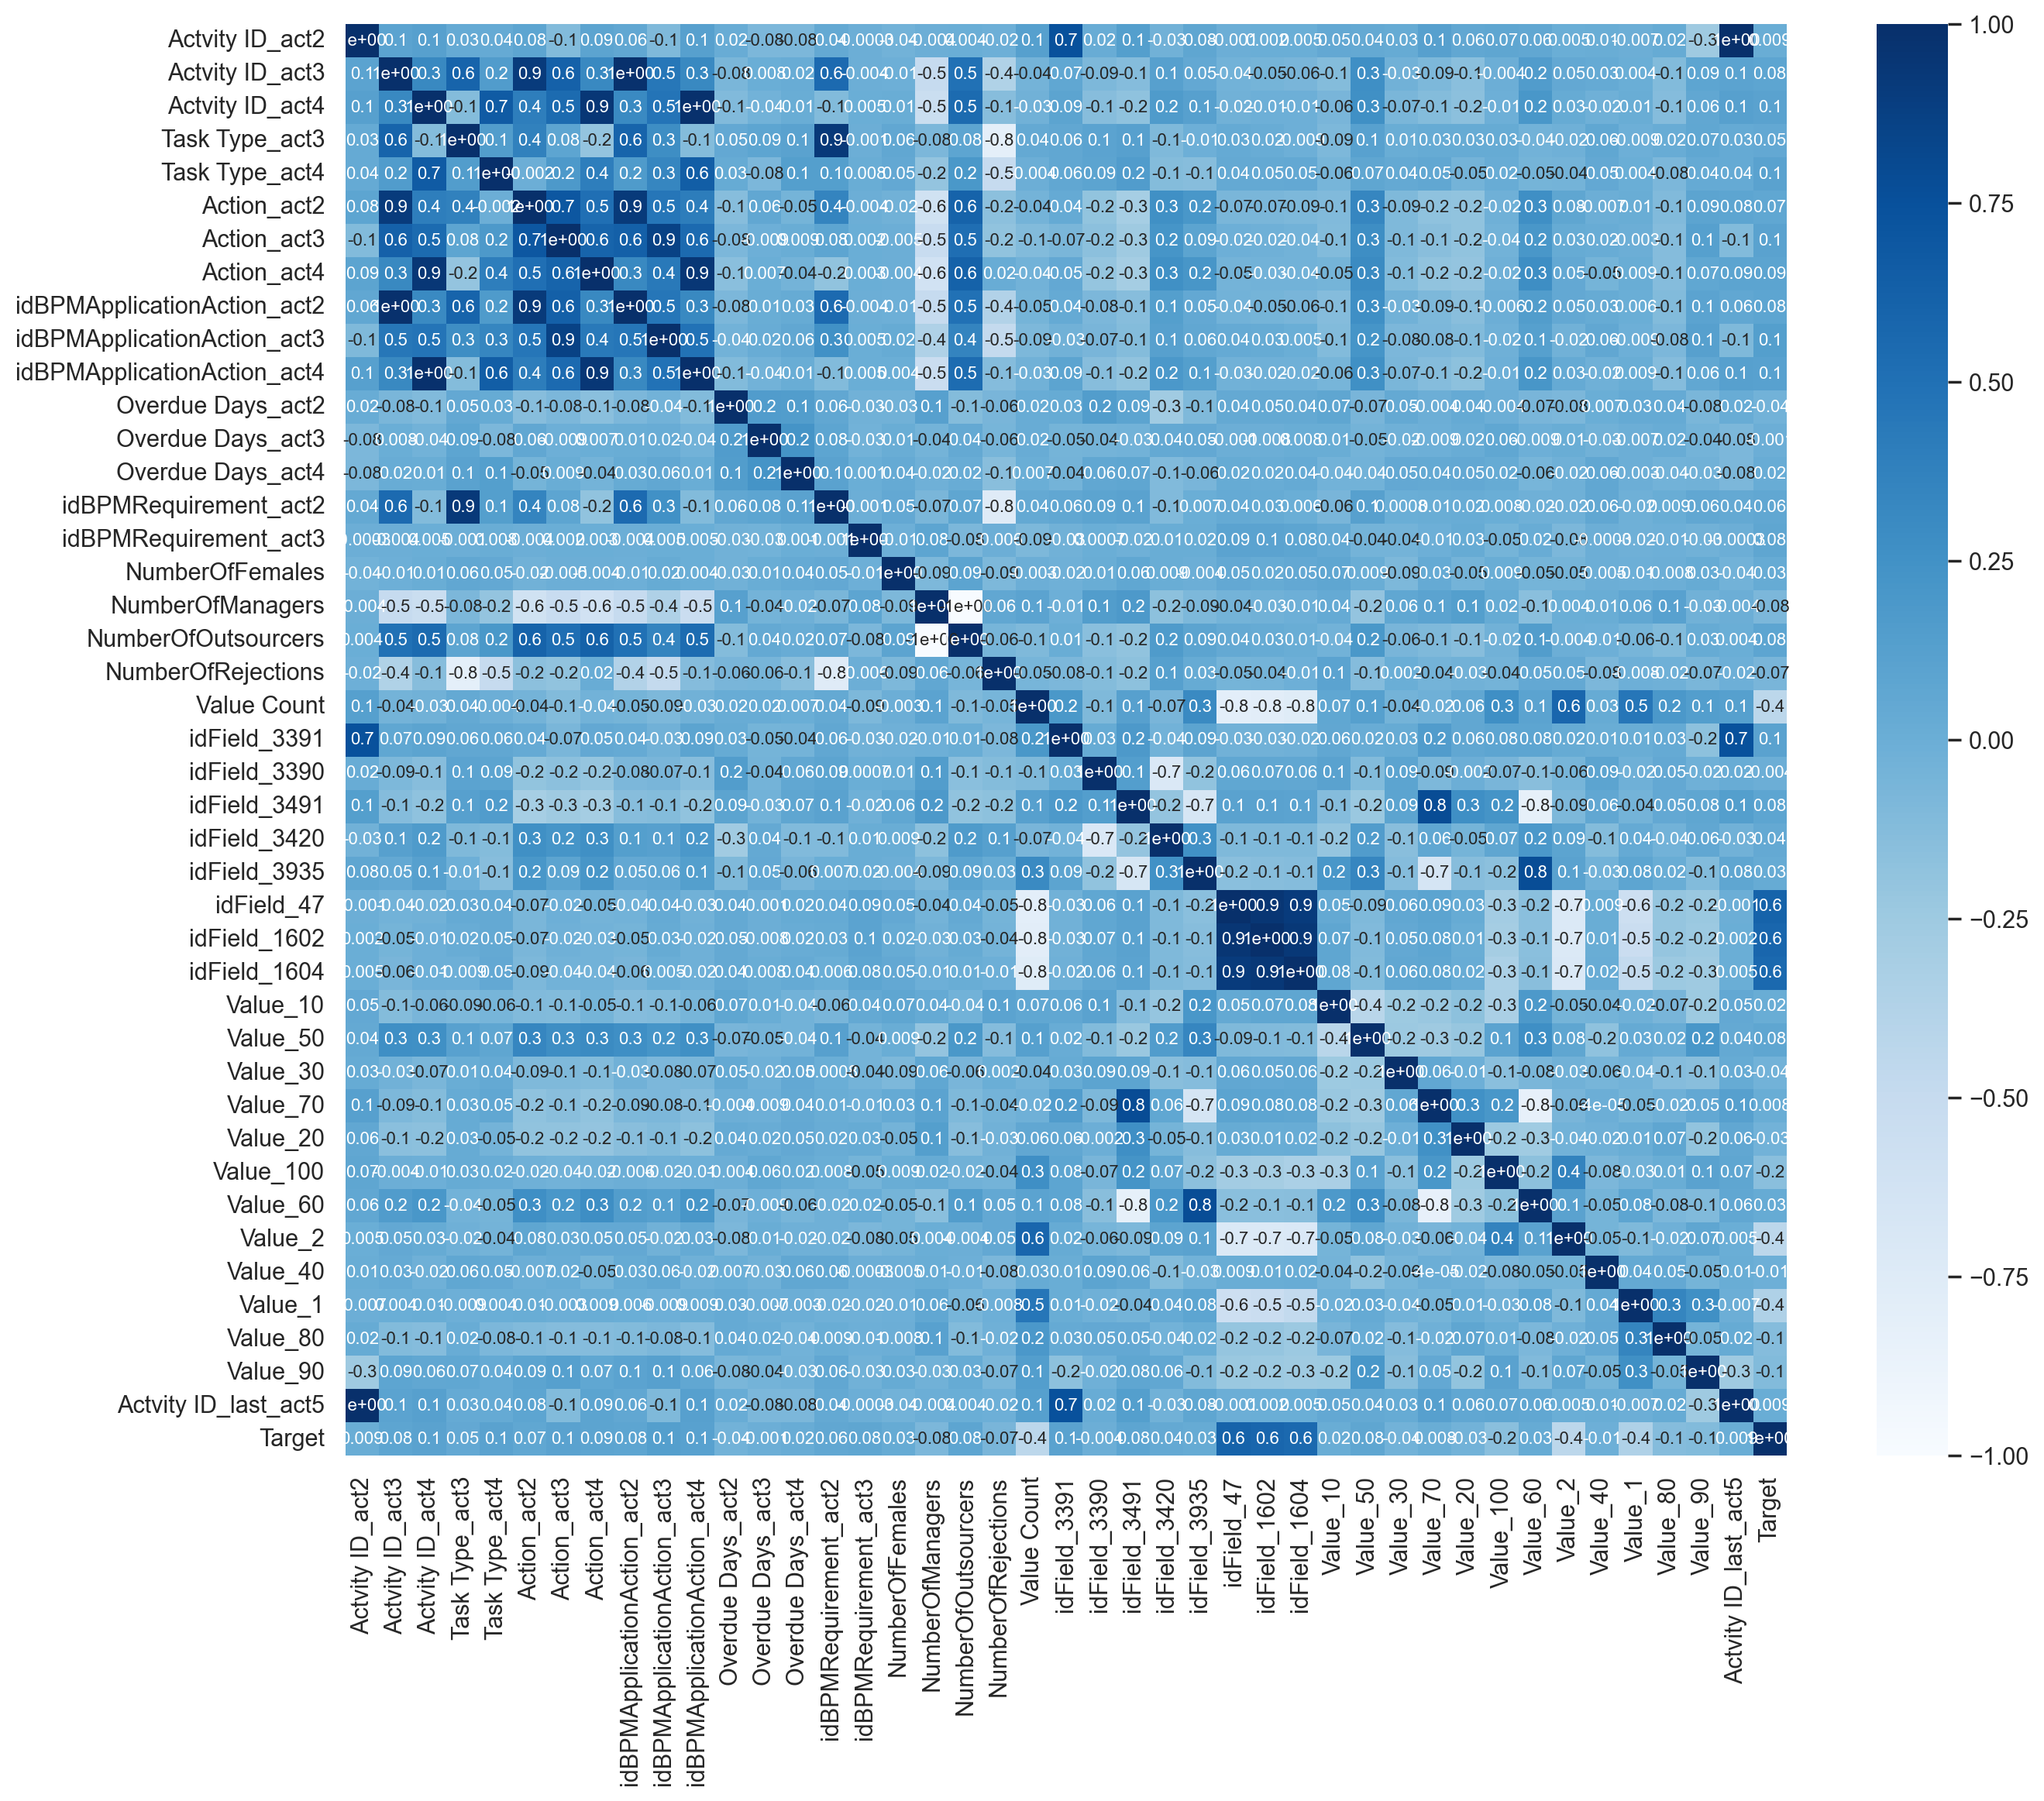

In [304]:
def cor_heatmap(cor):
    plt.figure(figsize=(15,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1', annot_kws = {"size": 8})
    plt.show()

#Check Spearman Correlation
correlation_features = pd.concat([X_smote, y_smote], axis=1)
cor_spearman = correlation_features.corr(method ='spearman')

cor_heatmap(cor_spearman)

In [305]:
#Get correlation matrix for features only (excluding the Target)
feature_corr = cor_spearman.loc[X_smote.columns, X_smote.columns]

#List to keep track of features to eliminate
spearman_eliminate = []

#Iterate over each column and find highly correlated pairs
for i in range(len(feature_corr.columns)):
    for j in range(i):
        if abs(feature_corr.iloc[i, j]) > 0.8:  #Check high correlation
            col_i = feature_corr.columns[i]
            col_j = feature_corr.columns[j]
            target_corr_i = abs(cor_spearman.loc[col_i, 'Target'])
            target_corr_j = abs(cor_spearman.loc[col_j, 'Target'])
            #Eliminate the feature with lower correlation to the target
            if target_corr_i < target_corr_j:
                spearman_eliminate.append(col_i)
            else:
                spearman_eliminate.append(col_j)

#Remove duplicates from the elimination list
spearman_eliminate = list(set(spearman_eliminate))

#Eliminate features with low correlation to the target variable
for col in X_smote.columns:
    if abs(cor_spearman.loc[col, 'Target']) < 0.05:
        spearman_eliminate.append(col)

#Remove duplicates again in case some features are added twice
spearman_eliminate = list(set(spearman_eliminate))

#List of features to eliminate
print("Features to eliminate:", spearman_eliminate)

#Remaining features after elimination
remaining_features = [col for col in X_smote.columns if col not in spearman_eliminate]
print("Remaining features:", remaining_features)

Features to eliminate: ['idField_3420', 'idField_1602', 'Value_40', 'NumberOfManagers', 'Value_60', 'Actvity ID_act4', 'Value Count', 'Value_70', 'Action_act3', 'Action_act2', 'Task Type_act3', 'idField_3390', 'NumberOfFemales', 'Overdue Days_act4', 'Overdue Days_act2', 'Overdue Days_act3', 'Value_30', 'idField_1604', 'idField_3935', 'Value_20', 'Actvity ID_last_act5', 'Value_10', 'Actvity ID_act2', 'Actvity ID_act3', 'Action_act4']
Remaining features: ['Task Type_act4', 'idBPMApplicationAction_act2', 'idBPMApplicationAction_act3', 'idBPMApplicationAction_act4', 'idBPMRequirement_act2', 'idBPMRequirement_act3', 'NumberOfOutsourcers', 'NumberOfRejections', 'idField_3391', 'idField_3491', 'idField_47', 'Value_50', 'Value_100', 'Value_2', 'Value_1', 'Value_80', 'Value_90']


### RFE 

We are going to use RFE to identify the most important features for our model. The process involves recursively training the model with subsets of features, removing the least important features at each iteration until the desired number of features is reached (based on the model's performance, using f1-score on the validation dataset)

In [254]:
nof_list = np.arange(2, len(X_train.columns) + 1)
high_score = 0
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(random_state = 42)

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

    X_train_rfe = rfe.fit_transform(X_smote, y_smote)
    X_val_rfe = rfe.transform(X_val)

    model.fit(X_train_rfe, y_smote)

    #Storing results on training data
    train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_smote, train_pred, average='weighted')
    train_score_list.append(train_score)

    #Storing results on validation data
    val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val, val_pred, average='weighted')
    val_score_list.append(val_score)

    #Check best score
    if (val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 30
Score with 30 features: 0.696225


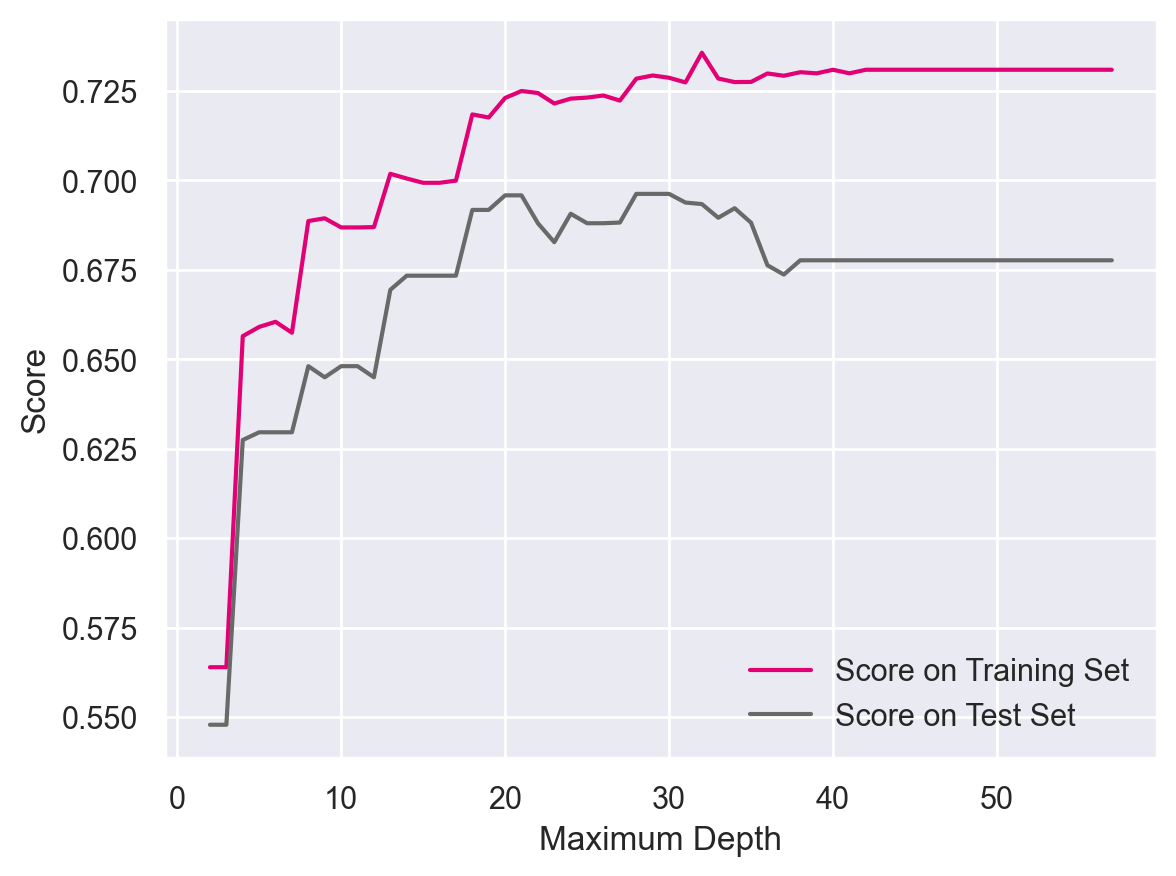

In [255]:
#Plotting the score on train and on validation to help us choose the desired number of features
plt.plot(list(range(2, len(X_train.columns) + 1)), train_score_list, label = "Score on Training Set", color = "#E20074")
plt.plot(list(range(2, len(X_train.columns) + 1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

We have chosen 15 features since we are trying to maxime the f1-score on the validation set and minimize the difference in the score of the val to the train set (minimize overfitting)

In [306]:
#Fitting the model again, but now with the desired number of features 
model = LogisticRegression(random_state=42)
rfe = RFE(estimator = model, n_features_to_select = 15)

X_rfe = rfe.fit_transform(X_smote, y_smote)

In [307]:
#Evaluate what columns should we keep based on RFE
pd.Series(rfe.support_, index = X_smote.columns)

Actvity ID_act2                 True
Actvity ID_act3                False
Actvity ID_act4                False
Task Type_act3                 False
Task Type_act4                 False
Action_act2                     True
Action_act3                    False
Action_act4                    False
idBPMApplicationAction_act2     True
idBPMApplicationAction_act3    False
idBPMApplicationAction_act4     True
Overdue Days_act2              False
Overdue Days_act3              False
Overdue Days_act4              False
idBPMRequirement_act2          False
idBPMRequirement_act3          False
NumberOfFemales                False
NumberOfManagers                True
NumberOfOutsourcers             True
NumberOfRejections             False
Value Count                     True
idField_3391                   False
idField_3390                   False
idField_3491                    True
idField_3420                   False
idField_3935                    True
idField_47                      True
i

In [308]:
#List with features to eliminate
rfe_eliminate = []
rfe_dataset = pd.Series(rfe.support_, index = X_smote.columns)

for index, value in rfe_dataset.items():
    if not value:
        rfe_eliminate.append(index)

In [309]:
rfe_eliminate

['Actvity ID_act3',
 'Actvity ID_act4',
 'Task Type_act3',
 'Task Type_act4',
 'Action_act3',
 'Action_act4',
 'idBPMApplicationAction_act3',
 'Overdue Days_act2',
 'Overdue Days_act3',
 'Overdue Days_act4',
 'idBPMRequirement_act2',
 'idBPMRequirement_act3',
 'NumberOfFemales',
 'NumberOfRejections',
 'idField_3391',
 'idField_3390',
 'idField_3420',
 'idField_1604',
 'Value_10',
 'Value_50',
 'Value_30',
 'Value_70',
 'Value_20',
 'Value_100',
 'Value_2',
 'Value_40',
 'Value_80']

### Lasso

Lasso helps us pick the most important features for our model. It squeezes out less useful features by making their effects smaller, while keeping the important ones.

In [310]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [311]:
reg = LassoCV()
reg.fit(X_smote, y_smote)

coef = pd.Series(reg.coef_, index = X_smote.columns).round(6)
coef

Actvity ID_act2               -0.000000
Actvity ID_act3               -0.083305
Actvity ID_act4               -0.000000
Task Type_act3                 0.000000
Task Type_act4                -0.000000
Action_act2                    0.291588
Action_act3                    0.000000
Action_act4                   -0.008440
idBPMApplicationAction_act2   -0.085631
idBPMApplicationAction_act3    0.150785
idBPMApplicationAction_act4    0.391280
Overdue Days_act2             -0.000000
Overdue Days_act3              0.016927
Overdue Days_act4             -0.794009
idBPMRequirement_act2          0.145160
idBPMRequirement_act3          0.007652
NumberOfFemales               -0.004462
NumberOfManagers               0.191381
NumberOfOutsourcers           -0.000000
NumberOfRejections             0.140661
Value Count                   -0.000000
idField_3391                   1.377712
idField_3390                   0.198829
idField_3491                   0.994425
idField_3420                   0.219637


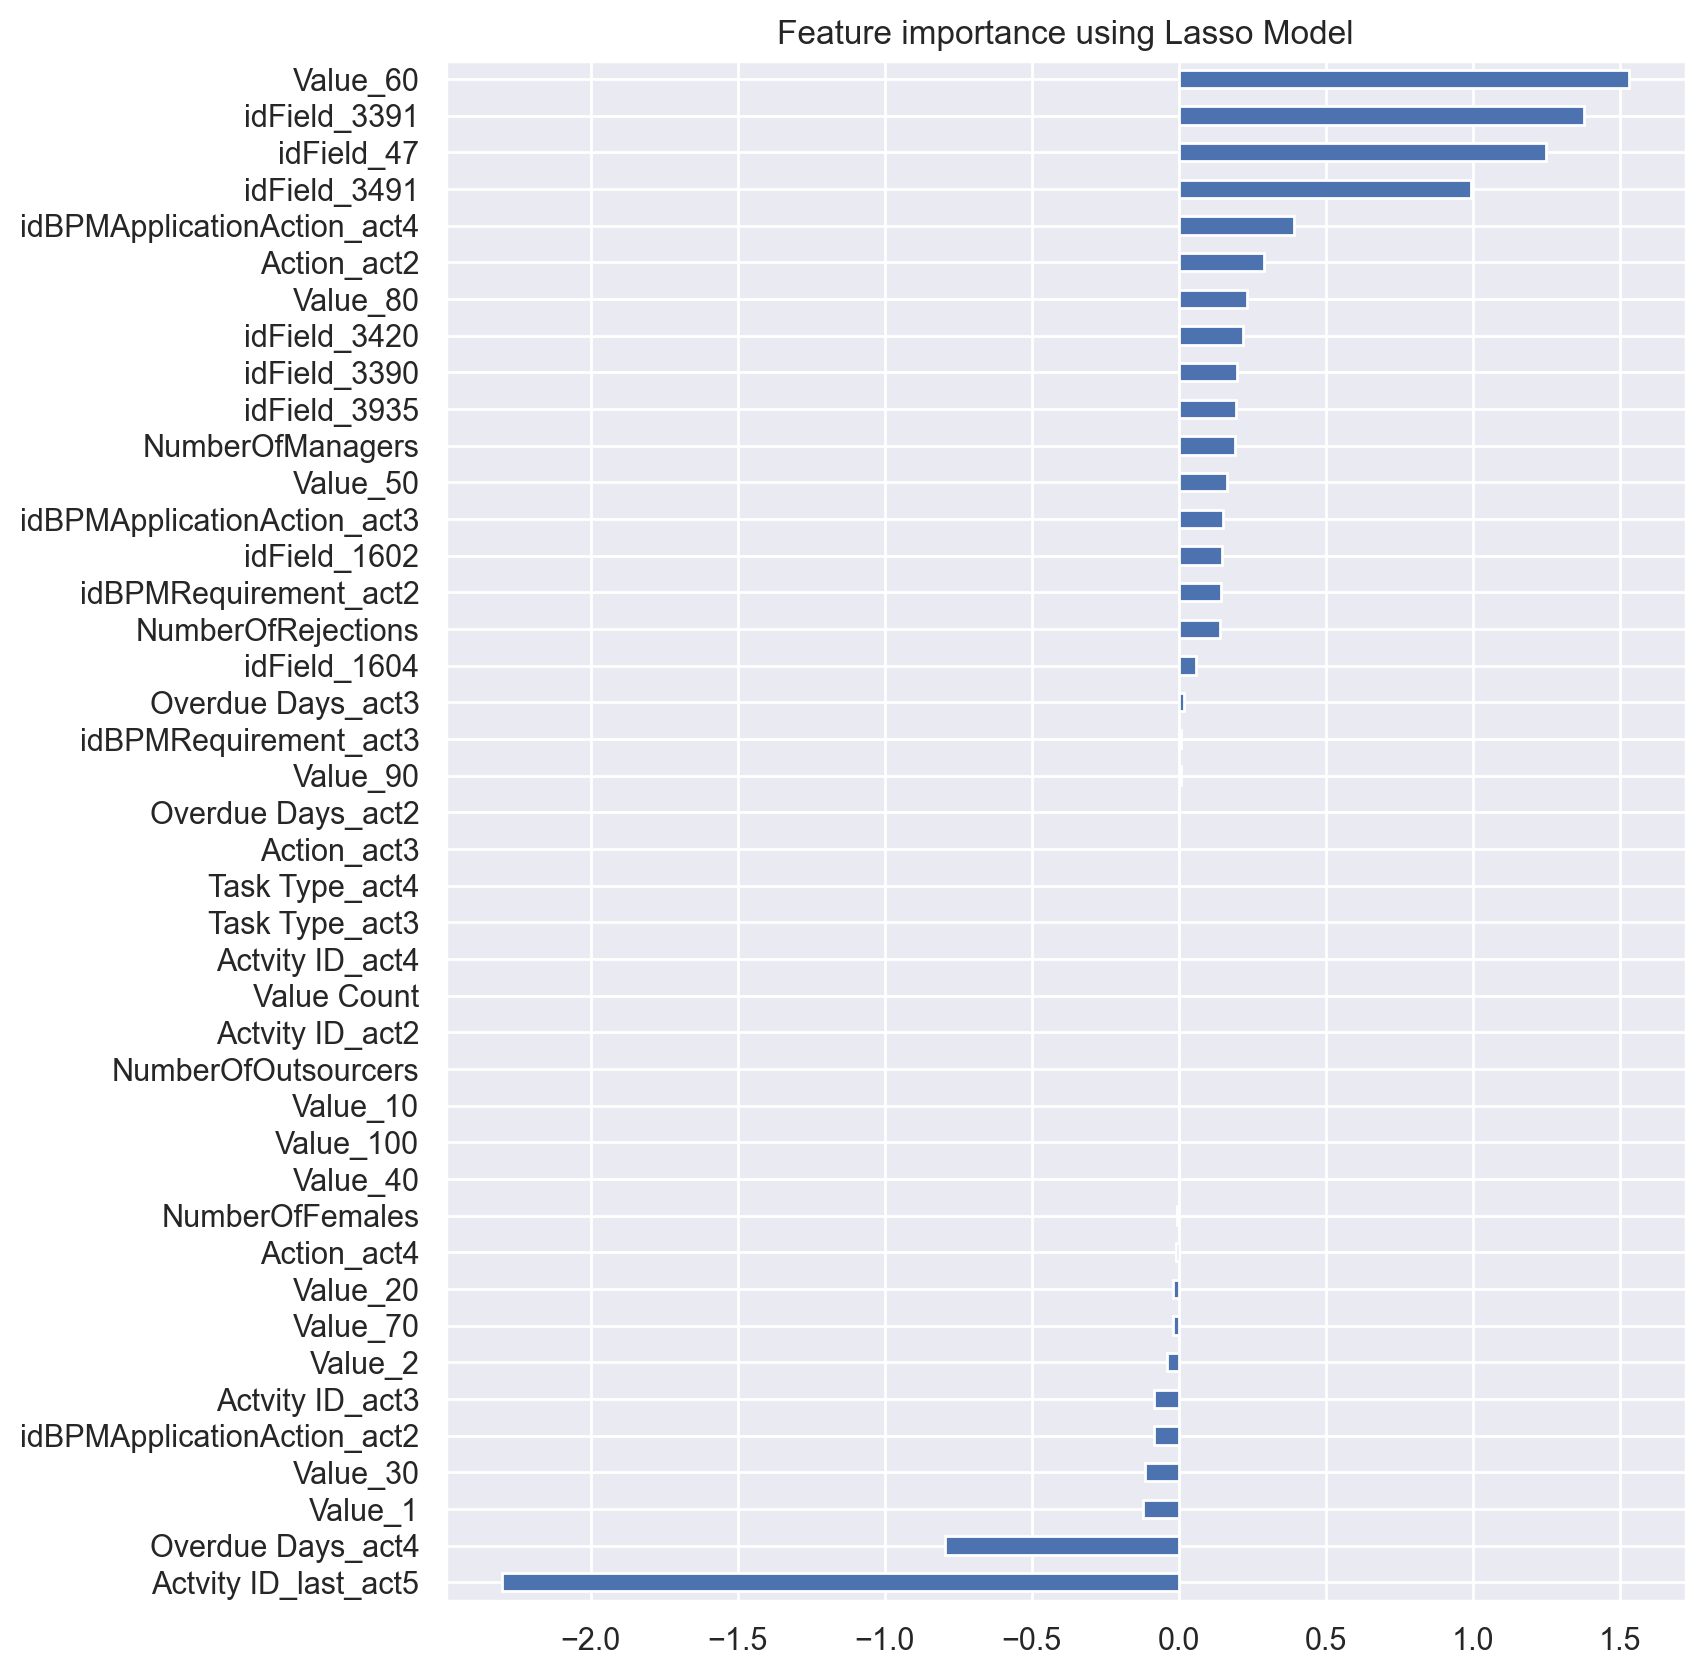

In [312]:
#Feature importance for the model prediction
plot_importance(coef,'Lasso')

In [313]:
#Variables to eliminate using Lasso 
selected_variables = (coef >= -0.1) & (coef <= 0.1)
lasso_eliminate = coef.index[selected_variables].tolist()

print("Variables to eliminate with Lasso:", lasso_eliminate)

Variables to eliminate with Lasso: ['Actvity ID_act2', 'Actvity ID_act3', 'Actvity ID_act4', 'Task Type_act3', 'Task Type_act4', 'Action_act3', 'Action_act4', 'idBPMApplicationAction_act2', 'Overdue Days_act2', 'Overdue Days_act3', 'idBPMRequirement_act3', 'NumberOfFemales', 'NumberOfOutsourcers', 'Value Count', 'idField_1604', 'Value_10', 'Value_70', 'Value_20', 'Value_100', 'Value_2', 'Value_40', 'Value_90']


### Decision Tree

Decision Trees work by recursively splitting the data based our features, aiming to create clear and interpretable rules that capture the patterns in our dataset. The feature importances obtained from a Decision Tree tell us how much each feature contributes to the decision-making process. 

Actvity ID_act2: 0.013
Actvity ID_act3: 0.001
Actvity ID_act4: 0.007
Task Type_act3: 0.004
Task Type_act4: 0.005
Action_act2: 0.003
Action_act3: 0.004
Action_act4: 0.032
idBPMApplicationAction_act2: 0.003
idBPMApplicationAction_act3: 0.017
idBPMApplicationAction_act4: 0.012
Overdue Days_act2: 0.024
Overdue Days_act3: 0.016
Overdue Days_act4: 0.036
idBPMRequirement_act2: 0.012
idBPMRequirement_act3: 0.002
NumberOfFemales: 0.069
NumberOfManagers: 0.02
NumberOfOutsourcers: 0.021
NumberOfRejections: 0.0
Value Count: 0.059
idField_3391: 0.0
idField_3390: 0.003
idField_3491: 0.005
idField_3420: 0.015
idField_3935: 0.005
idField_47: 0.331
idField_1602: 0.0
idField_1604: 0.002
Value_10: 0.051
Value_50: 0.047
Value_30: 0.057
Value_70: 0.023
Value_20: 0.03
Value_100: 0.032
Value_60: 0.0
Value_2: 0.0
Value_40: 0.026
Value_1: 0.002
Value_80: 0.005
Value_90: 0.008
Actvity ID_last_act5: 0.0


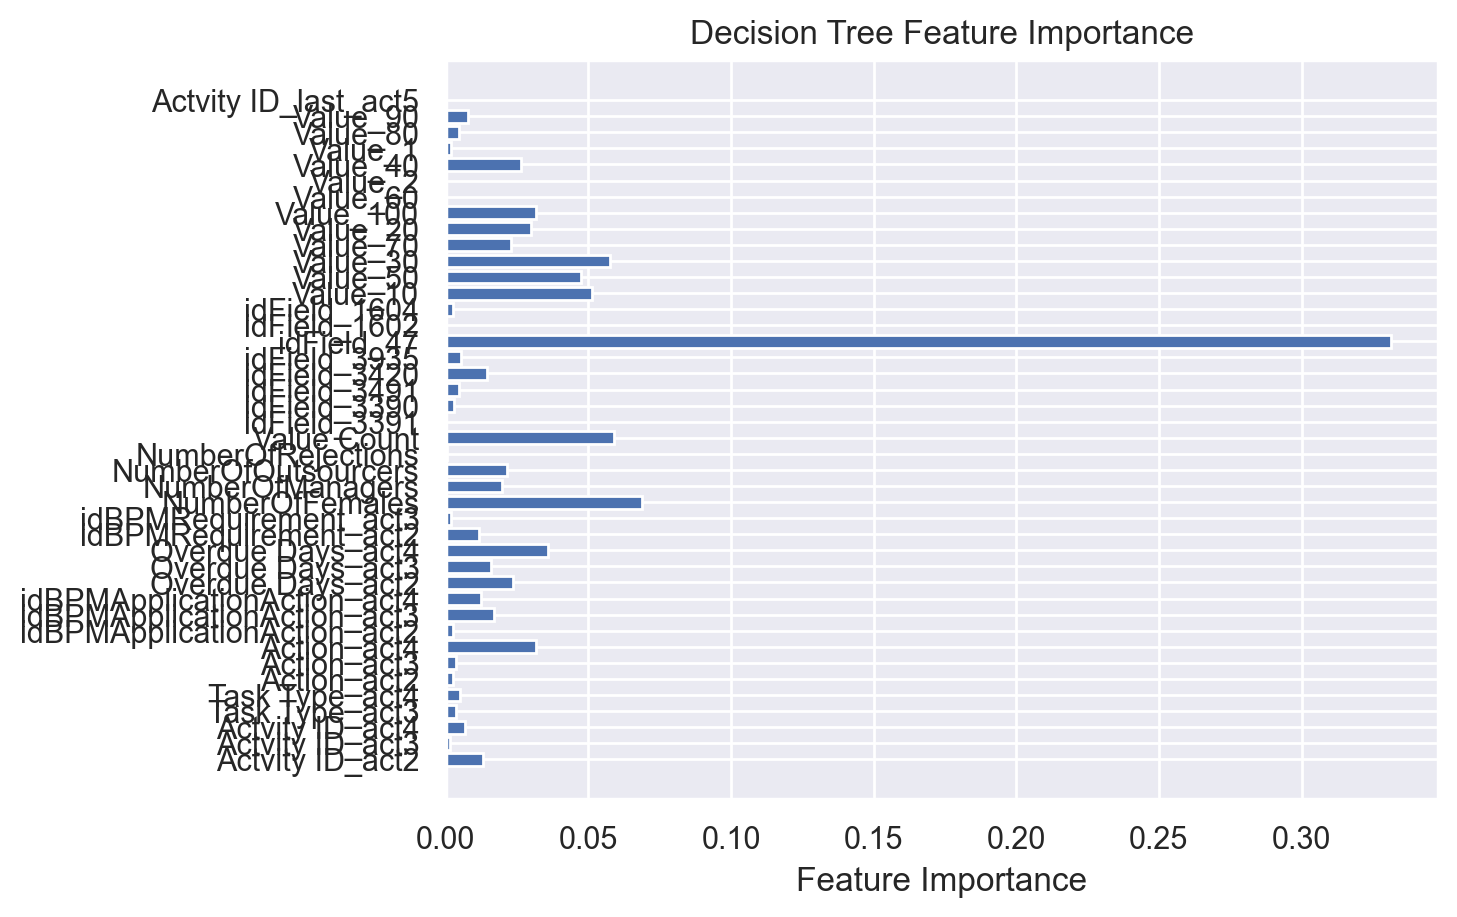

In [314]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_smote, y_smote)

#Get feature importances
feature_importances = clf.feature_importances_

decision_tree_eliminate = []

#Print feature importances
for feature, importance in zip(X_smote.columns, feature_importances):
    print(f"{feature}: {importance.round(3)}")
    if importance < 0.025:
        decision_tree_eliminate.append(feature)

plt.barh(X_smote.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [315]:
#List with features to eliminate 
decision_tree_eliminate

['Actvity ID_act2',
 'Actvity ID_act3',
 'Actvity ID_act4',
 'Task Type_act3',
 'Task Type_act4',
 'Action_act2',
 'Action_act3',
 'idBPMApplicationAction_act2',
 'idBPMApplicationAction_act3',
 'idBPMApplicationAction_act4',
 'Overdue Days_act2',
 'Overdue Days_act3',
 'idBPMRequirement_act2',
 'idBPMRequirement_act3',
 'NumberOfManagers',
 'NumberOfOutsourcers',
 'NumberOfRejections',
 'idField_3391',
 'idField_3390',
 'idField_3491',
 'idField_3420',
 'idField_3935',
 'idField_1602',
 'idField_1604',
 'Value_70',
 'Value_60',
 'Value_2',
 'Value_1',
 'Value_80',
 'Value_90',
 'Actvity ID_last_act5']

<a class="anchor" id="selectfin">

#### Final Feature Selection
###### [Go back to Contents](#top)
</a>

Finally, we developed a votting system. If the variable was eliminated for at least 2 of the methods used, then we will drop it.

In [316]:
#Combine all the lists into one list
all_eliminate = (
    rfe_eliminate
    + lasso_eliminate
    + decision_tree_eliminate
    + spearman_eliminate)

element_counts = Counter(all_eliminate)

#Minimum number of lists an element should appear in to drop it
min_appearances = 2

common_elements = [element for element, count in element_counts.items() if count >= min_appearances]
print(common_elements)

['Actvity ID_act3', 'Actvity ID_act4', 'Task Type_act3', 'Task Type_act4', 'Action_act3', 'Action_act4', 'idBPMApplicationAction_act3', 'Overdue Days_act2', 'Overdue Days_act3', 'Overdue Days_act4', 'idBPMRequirement_act2', 'idBPMRequirement_act3', 'NumberOfFemales', 'NumberOfRejections', 'idField_3391', 'idField_3390', 'idField_3420', 'idField_1604', 'Value_10', 'Value_30', 'Value_70', 'Value_20', 'Value_100', 'Value_2', 'Value_40', 'Value_80', 'Actvity ID_act2', 'idBPMApplicationAction_act2', 'NumberOfOutsourcers', 'Value Count', 'Value_90', 'Action_act2', 'NumberOfManagers', 'idField_3935', 'idField_1602', 'Value_60', 'Actvity ID_last_act5']


In [317]:
#Droping the variables in all necessary dataframes
X_train.drop(common_elements, axis=1, inplace=True)
X_val.drop(common_elements, axis=1, inplace=True)
X_smote.drop(common_elements, axis=1, inplace=True)

In [318]:
#Checking how many columns were left 
len(X_smote.columns)

5

In [319]:
#Which columns were left 
X_smote.columns

Index(['idBPMApplicationAction_act4', 'idField_3491', 'idField_47', 'Value_50',
       'Value_1'],
      dtype='object')

<a class="anchor" id="base">

#### Baseline Modeling
###### [Go back to Contents](#top)
</a>

Now, we reached the modelling phase. Firstly we are going to see the results on our train set with 2 simple and not yet tunned models. 

In [320]:
#Multiclass scoring metric
scoring_metric = make_scorer(f1_score, average='weighted')

#List of classifiers
clf_list = [('Gaussian Naive Bayes', GaussianNB()),
            ('Logistic Regression', LogisticRegression(random_state=42))]

cv_base_mean, cv_std = [], []
for clf in clf_list:

    cv = cross_val_score(estimator=clf[1],
                         X=X_smote,
                         y=y_smote,
                         scoring=scoring_metric,
                         cv=5,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (Weighted Recall):')

for i in range(len(clf_list)):
    print('   {}: {}'.format(clf_list[i][0], np.round(cv_base_mean[i], 2)))

Baseline Models (Weighted Recall):
   Gaussian Naive Bayes: 0.33
   Logistic Regression: 0.66


<a class="anchor" id="tun">

#### Model Tunning
###### [Go back to Contents](#top)
</a>

To find the best parameters for the Models we are going to use Random Search. Unlike GridSearch, instead of systematically checking every possible combination, it randomly selects configurations to try out sees the model performance wity those parameters. This approach is normally more efficient and less computationally intensive, especially when the search space is large.

### Functions 

In [321]:
#Confusion Matrix and Model Assessment Metrics
def metrics(y_train, pred_train):
    print('___________________________________________________________________________________________________________')
    print('                                                TRAIN                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))

### Logistic Regression

Logistics Regression uses Logistic function to map inputs to probabilities between 0 and 1, making it widely used for its simplicity and interpretability.

In [322]:
#Logistic Regression classifier
lr = LogisticRegression(random_state=42)

#Search Space 
param_distributions = {
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),  # 20 values between 1e-4 and 1e4
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10),  # Only useful if penalty is 'elasticnet'
    'class_weight': ['balanced']
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
lr_clf = RandomizedSearchCV(estimator=lr,
                            param_distributions=param_distributions,
                            scoring=scoring_metric,
                            cv=5,
                            verbose=False,
                            n_iter=100,  
                            n_jobs=-1,
                            random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_lr_clf = lr_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_lr_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 300, 'l1_ratio': 0.8888888888888888, 'class_weight': 'balanced', 'C': 545.5594781168514}

Best parameters found by RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 300, 'l1_ratio': 0.8888888888888888, 'class_weight': 'balanced', 'C': 545.5594781168514}


In [323]:
#Defining the model with the best parameters found
lr_best = LogisticRegression(
    solver='liblinear', 
    penalty='l2', 
    max_iter=300, 
    l1_ratio=0.8888888888888888, 
    C=545.5594781168514,
    class_weight='balanced',
    random_state=42
)

#Fit the new Logistic Regression model with the best parameters
lr_fit = lr_best.fit(X_smote, y_smote)
lr_pred_train = lr_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, lr_pred_train)

print('f1_train:', f1_score(y_smote, lr_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.32      0.51      0.39        53
           1       0.99      0.78      0.87       318
           2       0.49      0.45      0.47       284
           3       0.67      0.74      0.70       554

    accuracy                           0.67      1209
   macro avg       0.62      0.62      0.61      1209
weighted avg       0.70      0.67      0.68      1209

[[ 27   0   8  18]
 [  6 248  16  48]
 [ 16   1 129 138]
 [ 36   1 109 408]]
f1_train: 0.68


### SVC

SVC aims to find the best hyperplane separating classes of the target variable. By maximizing the margin between classes, it handles linear and non-linear data using kernel functions.

In [324]:
#Define the SVC classifier
svc = SVC(probability=True, random_state=42)

#Define the expanded parameter grid (Search Space)
param_distributions = {
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)),  # Including more values for gamma
    'C': np.logspace(-2, 2, 10),  # 10 values between 0.01 and 100
    'class_weight': ['balanced']
}

#Sscoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
svc_clf = RandomizedSearchCV(estimator=svc,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=False,
                             n_iter=50,  
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_svc_clf = svc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_svc_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 1.6681005372000592}

Best parameters found by RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 1.6681005372000592}


In [325]:
#Defining the model with the best parameters found
svc_best = SVC(kernel='rbf',
               gamma= 'auto',
               C= 1.6681005372000592,
               probability=True,
               class_weight='balanced',
               random_state=42)

#Fit the new Logistic Regression model with the best parameters
svc_fit = svc_best.fit(X_smote, y_smote)
svc_pred_train = svc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, svc_pred_train)

print('f1_train:', f1_score(y_smote, svc_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.20      0.68      0.31        53
           1       0.99      0.78      0.87       318
           2       0.47      0.73      0.57       284
           3       0.74      0.45      0.56       554

    accuracy                           0.61      1209
   macro avg       0.60      0.66      0.58      1209
weighted avg       0.72      0.61      0.63      1209

[[ 36   0  13   4]
 [ 11 247  24  36]
 [ 30   1 206  47]
 [102   1 199 252]]
f1_train: 0.63


### Random Forest 

Random Forest is an ensemble learning method that builds multiple decision trees and merges them for better accuracy and stability. By majority voting (in classification problems) across the trees, it reduces overfitting and improves predictive performance. 

In [326]:
#Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

#Define the expanded parameter grid
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': np.arange(5, 21, 5),
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'class_weight': ['balanced']
}

#Define the scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
rf_clf = RandomizedSearchCV(estimator=rf,
                            param_distributions=param_distributions,
                            scoring=scoring_metric,
                            cv=5,
                            verbose=False,
                            n_iter=70,  
                            n_jobs=-1,
                            random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_rf_clf = rf_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_rf_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}


Best parameters found by RandomizedSearchCV: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}


In [327]:
#Define the best Random Forest model
rf_best = RandomForestClassifier(n_estimators= 400,
                                  min_samples_split= 10,
                                  min_samples_leaf= 4, 
                                  max_features= 'sqrt', 
                                  max_depth= 10, 
                                  criterion= 'gini', 
                                  bootstrap= True,
                                  class_weight='balanced',
                                  random_state=42
)

#Fit the new Random Forest model with the best parameters
rf_fit = rf_best.fit(X_smote, y_smote)
rf_pred_train = rf_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, rf_pred_train)

print('f1_train:', f1_score(y_smote, rf_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.21      0.68      0.33        53
           1       0.99      0.78      0.87       318
           2       0.48      0.69      0.56       284
           3       0.73      0.50      0.60       554

    accuracy                           0.63      1209
   macro avg       0.60      0.66      0.59      1209
weighted avg       0.72      0.63      0.65      1209

[[ 36   0  13   4]
 [  7 248  24  39]
 [ 28   1 196  59]
 [ 97   1 178 278]]
f1_train: 0.65


### Gradient Boost

Gradient Boosting builds models sequentially. Each new model corrects the errors of the previous ones, combining them for better accuracy. At the end, for classification tasks it uses weighted voting to determine the final class label of the target variable.

In [328]:
#Define the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=15)

#Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 300, 600, 1000],
    'subsample': [0.66, 0.75, 0.85, 1.0],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],  
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_iter_no_change': [10, 20, 30],
    'validation_fraction': [0.1, 0.2, 0.3],
    'tol': [0.0001, 0.001, 0.01]
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
gbc_clf = RandomizedSearchCV(estimator=gbc,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=False,
                             n_iter=70,  # Number of parameter settings sampled
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_gbc_clf = gbc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_gbc_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'validation_fraction': 0.1, 'tol': 0.001, 'subsample': 0.85, 'n_iter_no_change': 20, 'n_estimators': 600, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}

Best parameters found by RandomizedSearchCV: {'validation_fraction': 0.1, 'tol': 0.001, 'subsample': 0.85, 'n_iter_no_change': 20, 'n_estimators': 600, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}


In [329]:
#Model with the best parameters
gbc_best = GradientBoostingClassifier(
    validation_fraction=0.1,
    tol=0.001,
    subsample=0.85,
    n_iter_no_change=20,
    n_estimators=600,
    min_samples_split=7,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
#Fit the new Gradient Boosting Classifier model with the best parameters
gbc_fit=gbc_best.fit(X_smote, y_smote)
gbc_pred_train = gbc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, gbc_pred_train)

#Print F1 score for the training set
print('f1_train:', f1_score(y_smote, gbc_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        53
           1       0.99      0.78      0.87       318
           2       0.52      0.41      0.46       284
           3       0.65      0.84      0.74       554

    accuracy                           0.70      1209
   macro avg       0.67      0.55      0.58      1209
weighted avg       0.70      0.70      0.69      1209

[[  9   0   9  35]
 [  1 248  18  51]
 [  2   1 116 165]
 [  6   1  79 468]]
f1_train: 0.69


### XGBOOST

XGBOOST is an advanced implementation of gradient boosting designed for speed and performance. It builds models sequentially, with each new model correcting the errors of the previous ones. 

In [330]:
#Define the XGBoost classifier
xgb = XGBClassifier(random_state=42)

#Define the expanded parameter grid
param_distributions = {
    'n_estimators': np.arange(50, 301, 50),
    'learning_rate': np.logspace(-3, 0, 10), 
    'max_depth': np.arange(3, 11),
    'reg_alpha': np.linspace(0, 1, 10),
    'reg_lambda': np.linspace(0, 1, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 1, 10),
    'min_child_weight': np.arange(1, 11)
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
xgb_clf = RandomizedSearchCV(estimator=xgb,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=3,
                             n_iter=70,  
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_xgb_clf = xgb_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_xgb_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'subsample': 0.6, 'reg_lambda': 0.6666666666666666, 'reg_alpha': 1.0, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 1.0, 'gamma': 0.2222222222222222, 'colsample_bytree': 0.5}

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters found by RandomizedSearchCV: {'subsample': 0.6, 'reg_lambda': 0.6666666666666666, 'reg_alpha': 1.0, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 1.0, 'gamma': 0.2222222222222222, 'colsample_bytree': 0.5}


In [331]:
#Defining the model with the best parameters 
xgb_best = XGBClassifier(
    subsample=0.6,
    reg_lambda=0.6666666666666666,
    reg_alpha=1.0,
    n_estimators=250,
    min_child_weight=5,
    max_depth=9,
    learning_rate=1.0,
    gamma=0.2222222222222222,
    colsample_bytree=0.5,
    random_state=42
)

#Fit the new XGBoost model with the best parameters
xgb_fit = xgb_best.fit(X_smote, y_smote)
xgb_pred_train = xgb_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, xgb_pred_train)

print('f1_train:', f1_score(y_smote, xgb_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.19      0.27        53
           1       0.98      0.79      0.87       318
           2       0.53      0.40      0.46       284
           3       0.65      0.84      0.73       554

    accuracy                           0.70      1209
   macro avg       0.66      0.56      0.58      1209
weighted avg       0.70      0.70      0.69      1209

[[ 10   1   8  34]
 [  1 251  15  51]
 [  2   3 115 164]
 [  8   1  79 466]]
f1_train: 0.69


### LightGBM

LightGBM is a fast, high-performance implementation of gradient boosting. It builds models sequentially, optimizing for speed and memory efficiency by using a histogram-based method in which data is bucketed into bins using a histogram of the distributions. In classification, it uses weighted voting to determine the final class label.

In [332]:
#Define the LGBMClassifier
lgbmc = LGBMClassifier(random_state=42)

#Define the parameter grid
param_distributions = {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [200],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
lgbmc_clf = RandomizedSearchCV(estimator=lgbmc,
                               param_distributions=param_distributions,
                               scoring=scoring_metric,
                               cv=5,
                               verbose=False,
                               n_iter=70,  
                               n_jobs=-1,
                               random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_lgbmc_clf = lgbmc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_lgbmc_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 5, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.01, 'feature_fraction': 0.5}

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 1209, number of used features: 5
[LightGBM] [Info] Start training from score -3.127257
[LightGBM] [Info] Start training from score -1.335497
[LightGBM] [Info] Start training from score -1.448575
[LightGBM] [Info] Start training from score -0.780384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [333]:
#Defining the model with the best parameters 
lgbmc_best = LGBMClassifier(
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=5,
    n_estimators=200,
    min_child_samples=5,
    max_depth=5,
    learning_rate=0.01,
    feature_fraction=0.5,
    random_state=42
)


#Fit the new LGBM model with the best parameters
lgbmc_fit = lgbmc_best.fit(X_smote, y_smote)
lgbmc_pred_train = lgbmc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, lgbmc_pred_train)

print('f1_train:', f1_score(y_smote, lgbmc_pred_train, average='weighted').round(2))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 1209, number of used features: 5
[LightGBM] [Info] Start training from score -3.127257
[LightGBM] [Info] Start training from score -1.335497
[LightGBM] [Info] Start training from score -1.448575
[LightGBM] [Info] Start training from score -0.780384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

### Ensemble

Voting classifiers are ensemble methods that combine multiple different models to improve classification performance. We are using Soft Voting ensemble, where the final class label is determined by the weighted average of predicted probabilities from the models used.

In [334]:
#Define the estimators for the soft voting ensemble
estimators = [
    ('rf', rf_fit),
    ('gb', gbc_fit),
    ('xgb', xgb_fit),
    ('lgbm', lgbmc_fit),
    ('lr', lr_fit),
    ('svc', svc_fit)
]

#Create the soft voting ensemble
soft_voting_clf = VotingClassifier(estimators=estimators, voting='soft')

#Fit the ensemble to the training data
ensemble_model=soft_voting_clf.fit(X_smote, y_smote)

#Predict on the training set
soft_voting_pred_train = ensemble_model.predict(X_smote)

#Assess the ensemble's performance on the training set
metrics(y_smote, soft_voting_pred_train)

print('f1_train:', f1_score(y_smote, soft_voting_pred_train, average='weighted').round(2))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 1209, number of used features: 5
[LightGBM] [Info] Start training from score -3.127257
[LightGBM] [Info] Start training from score -1.335497
[LightGBM] [Info] Start training from score -1.448575
[LightGBM] [Info] Start training from score -0.780384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

<a class="anchor" id="impor">

### Models Feature Importance
###### [Go back to Contents](#top)
</a>

In this section, we will examine the variables that contributed most significantly to predicting the target variable in each model

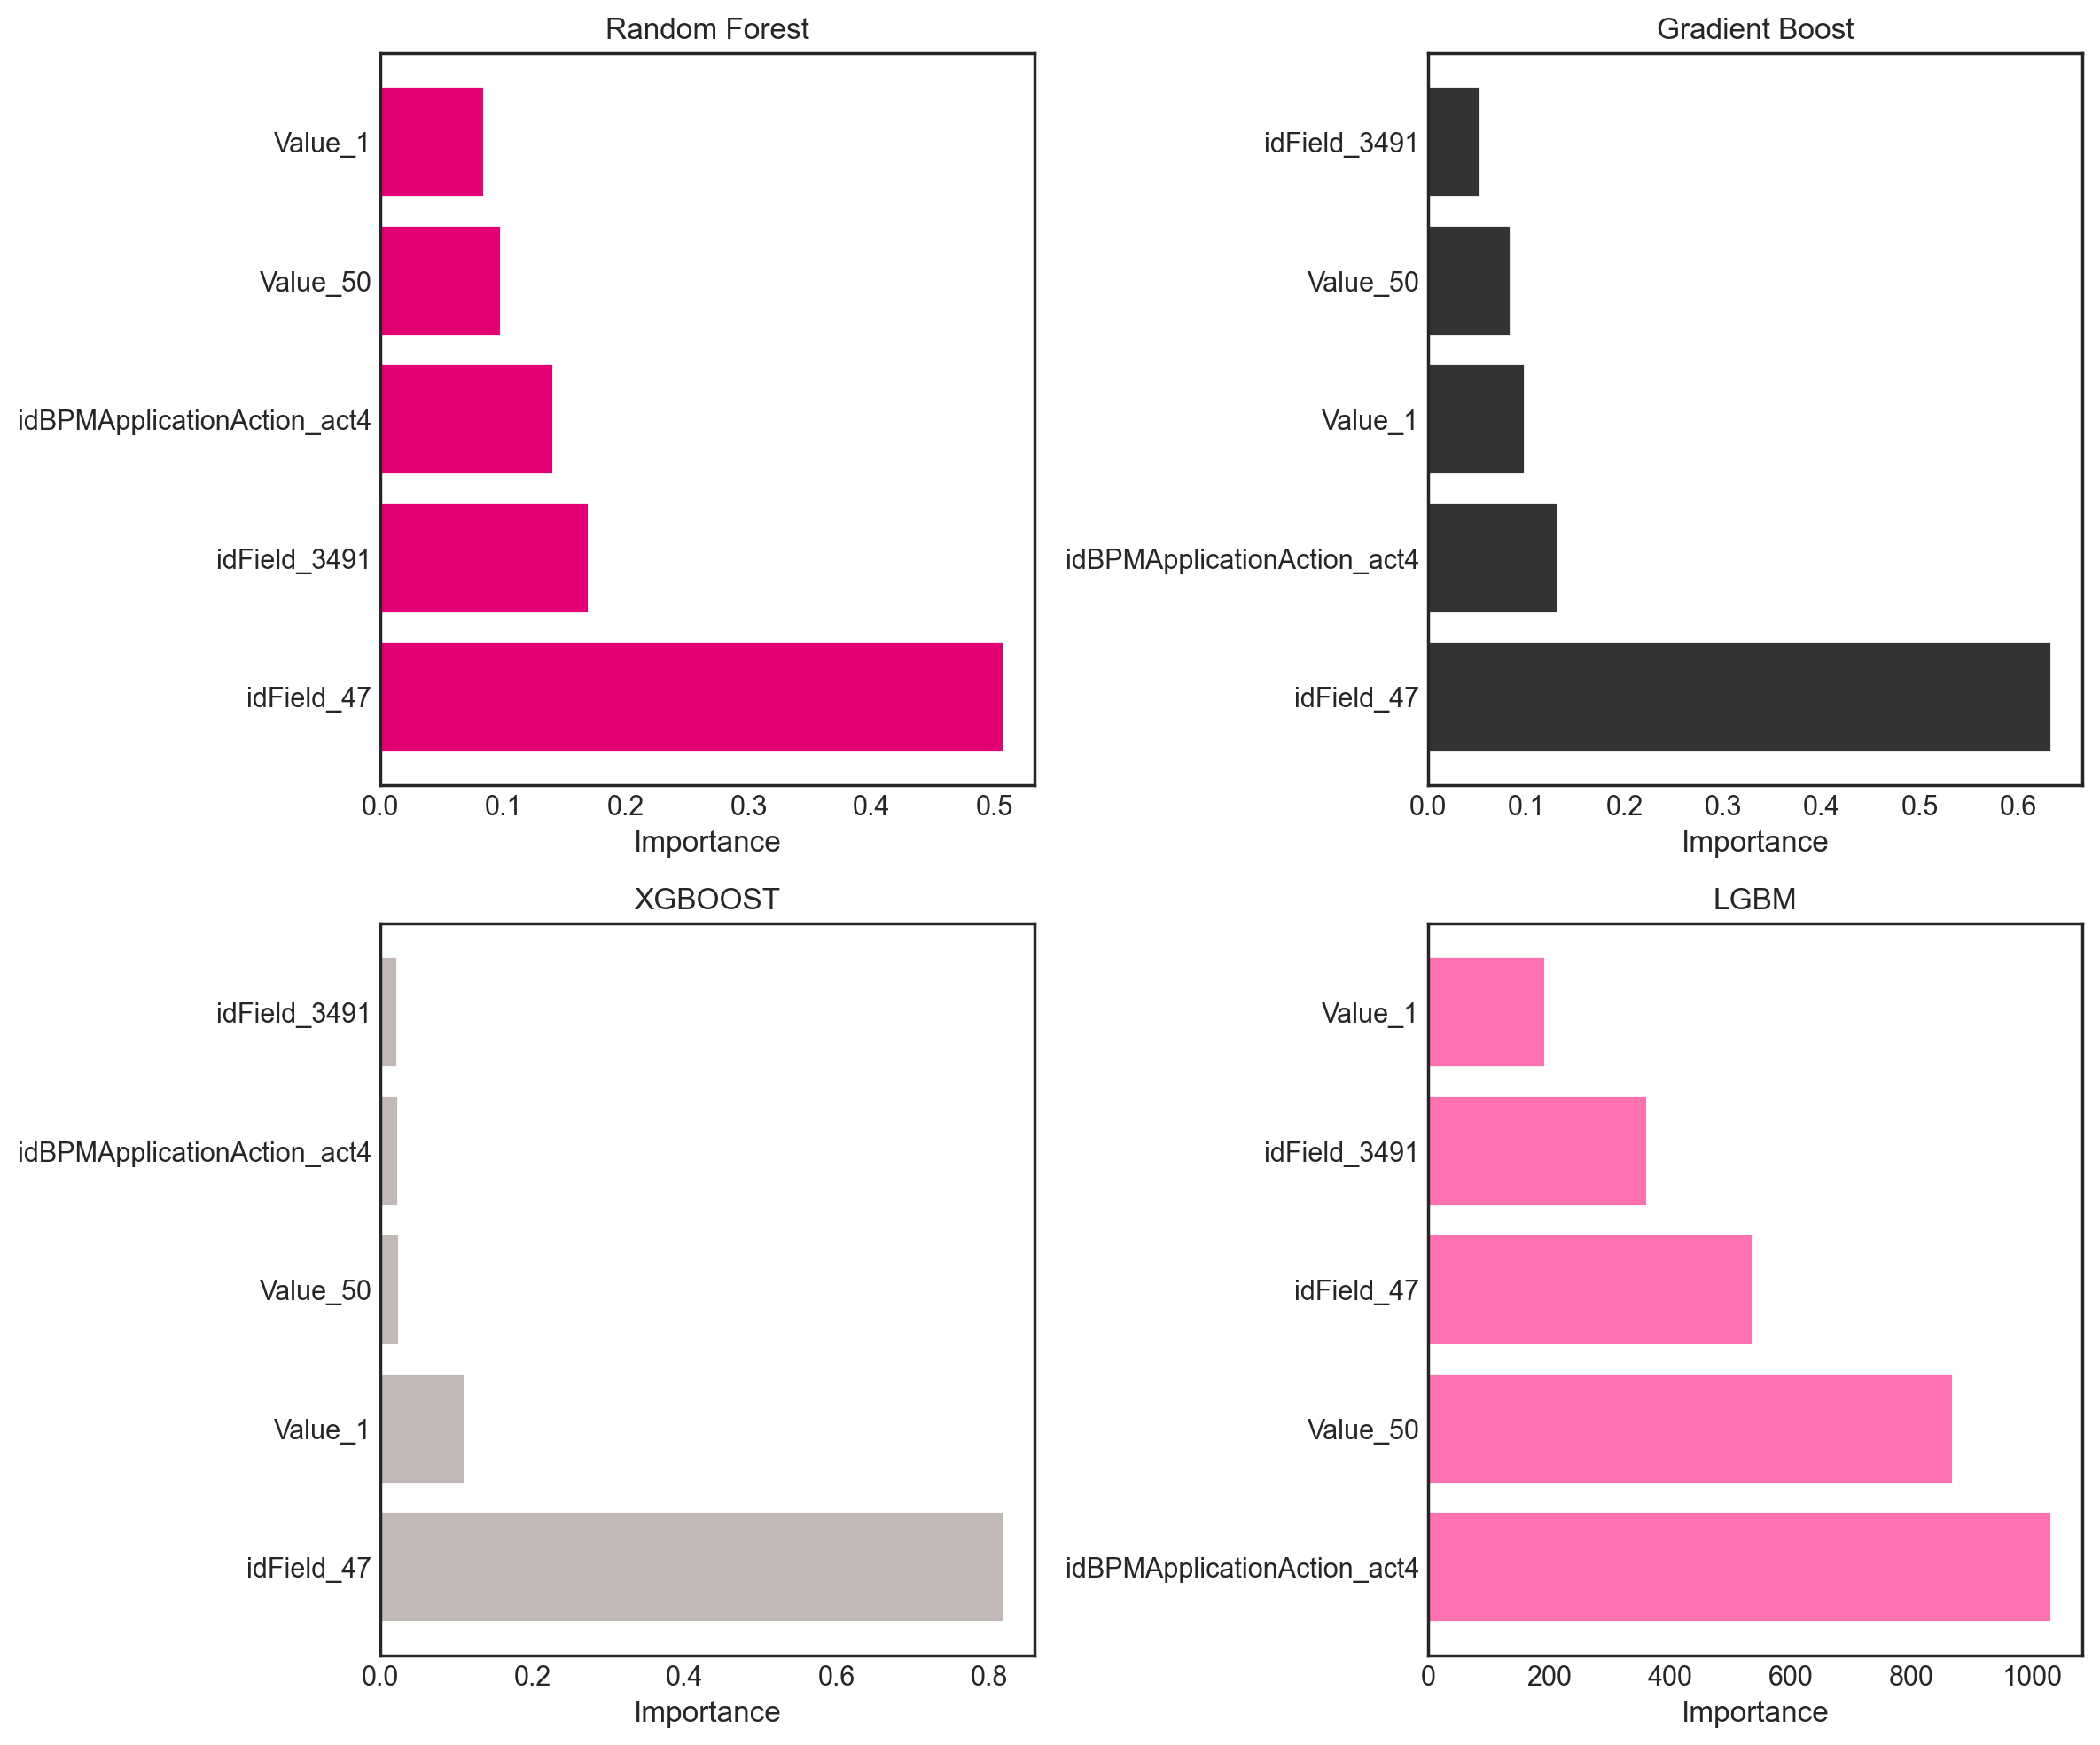

In [335]:
# Set white background
plt.style.use("seaborn-v0_8-white")

# Define the models and their names
models = {
    'Random Forest': rf_fit,
    'Gradient Boost': gbc_fit,
    'XGBOOST': xgb_fit,
    'LGBM': lgbmc_fit
}

# Define custom colors
colors = {"magenta": "#E20074", "dark_gray": "#333333", "light_gray": "#C1B8B7", "pink": "#FF71B1"}

# Assuming X_smote is a DataFrame, get the feature names
feature_names = X_smote.columns if hasattr(X_smote, 'columns') else [f'Feature {i}' for i in range(X_smote.shape[1])]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot feature importance for each model
for ax, (name, model), color in zip(axs.flatten(), models.items(), colors.values()):
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_names = np.array(feature_names)[sorted_indices]
    
    ax.barh(range(X_smote.shape[1]), feature_importance[sorted_indices], color=color)
    ax.set_yticks(range(X_smote.shape[1]))
    ax.set_yticklabels(sorted_feature_names)
    ax.set_title(name)
    ax.set_xlabel('Importance')

plt.tight_layout()
plt.show()

The feature importance plots for Random Forest, Gradient Boost, XGBoost, and LightGBM reveal that `idField_47` is the most critical feature for Random Forest, Gradient Boost, and XGBoost, while LightGBM places the highest importance on `idBPMApplicationAction_act4` and shows a more balanced distribution of feature importance. In all models, `idField_47` is significant, but LightGBM considers other features like `Value_50` and `idField_3491` more evenly, indicating variations in how each model leverages features for predictions.

<a class="anchor" id="TRAIN">

### Train Metrics Comparison 

###### [Go back to Contents](#top)
</a>

Here we can compare the diferent models performance on the train dataset using Precision, Recall and F1_score.
- Precision measures the proportion of correctly predicted positive instances (true positives) among all instances predicted as positive (true positives + false positives).
- Recall measures the proportion of correctly predicted positive instances (true positives) among all actual positive instances (true positives + false negatives). It focuses on the ability of the classifier to find all the positive instances.
- The F1 Score provides a single score that balances both precision and recall. It reaches its best value at 1 and worst at 0. It is a useful metric when we want to find a balance between precision and recall, especially when there is an uneven class distribution, that is our projects case.

In [337]:
#Our models definition
models = {
    'Logistic Regression': lr_fit,
    'SVC': svc_fit,
    'Random Forest': rf_fit,
    'Gradient Boost': gbc_fit,
    'LGBM': lgbmc_fit,
    'Ensemble': ensemble_model,
    'XGBOOST': xgb_fit,
}

#Initialize empty lists to store metrics
precision = []
recall = []
f1 = []

#Calculate metrics for each model
for name, model in models.items():
    pred_train = model.predict(X_smote)
    
    precision_score_train = precision_score(y_smote, pred_train, average='weighted')
    recall_score_train = recall_score(y_smote, pred_train, average='weighted')
    f1_score_train = f1_score(y_smote, pred_train, average='weighted')

    precision.append(precision_score_train)
    recall.append(recall_score_train)
    f1.append(f1_score_train)

#Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({'Model': list(models.keys()),
                           'Weighted Precision': precision,
                           'Weighted Recall': recall,
                           'Weighted F1 Score': f1})

metrics_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


,Model,Weighted Precision,Weighted Recall,Weighted F1 Score
0,Logistic Regression,0.695994,0.671629,0.678521
1,SVC,0.719843,0.612903,0.634695
2,Random Forest,0.717571,0.626964,0.649240
3,Gradient Boost,0.703849,0.695616,0.685426
4,LGBM,0.690320,0.687345,0.658627
5,Ensemble,0.699134,0.690653,0.684951
6,XGBOOST,0.701905,0.696443,0.686264


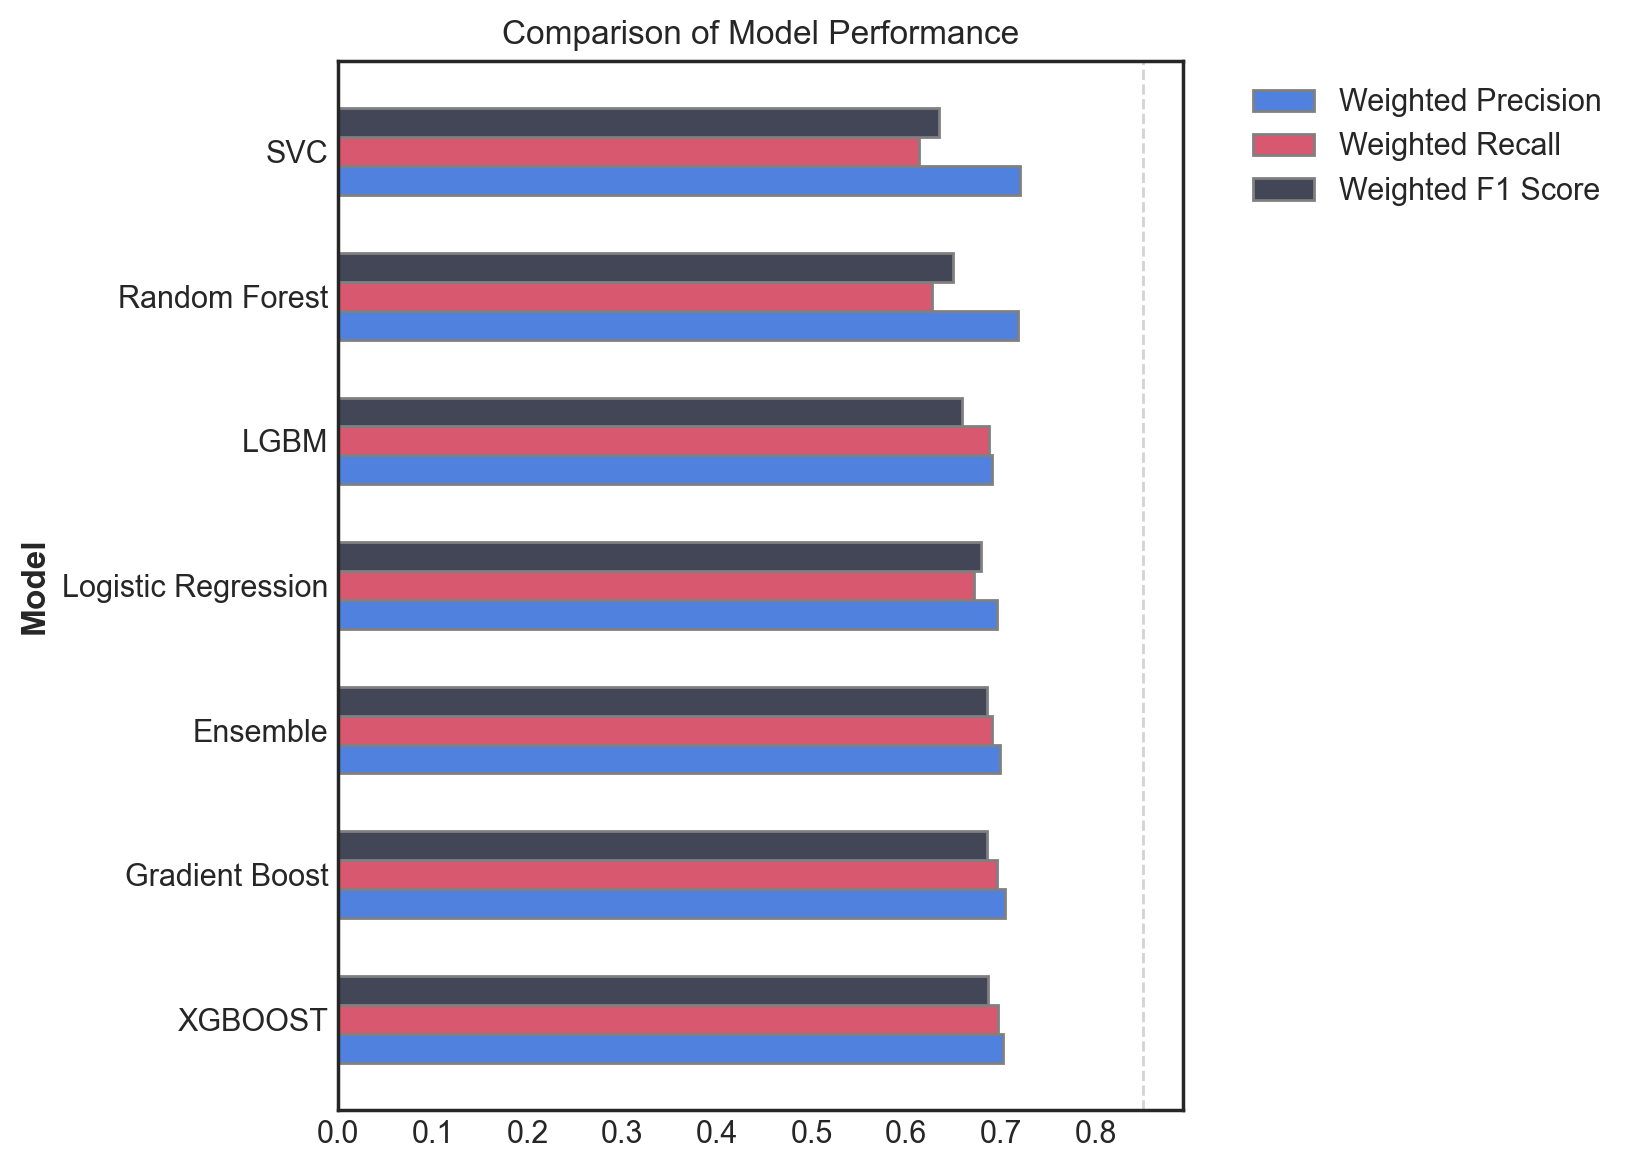

In [338]:
#Sort the DataFrame by 'Weighted F1 Score' in descending order
metrics_df = metrics_df.sort_values(by='Weighted F1 Score', ascending=False)

#Set the width of the bars
bar_width = 0.2

#Set the position of the bars on the y-axis
r1 = np.arange(len(metrics_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the bars horizontally
ax.barh(r1, metrics_df['Weighted Precision'], color='#5081DE', height=bar_width, edgecolor='grey', label='Weighted Precision')
ax.barh(r2, metrics_df['Weighted Recall'], color='#D85870', height=bar_width, edgecolor='grey', label='Weighted Recall')
ax.barh(r3, metrics_df['Weighted F1 Score'], color='#424656', height=bar_width, edgecolor='grey', label='Weighted F1 Score')

#Adding a light grey ticked line at 0.65 to provide better comparison
ax.axvline(x=0.85, color='lightgrey', linestyle='dashed', linewidth=1)

#yticks on the middle of the group bars
ax.set_ylabel('Model', fontweight='bold')
ax.set_yticks([r + bar_width for r in range(len(metrics_df))])
ax.set_yticklabels(metrics_df['Model'])

#Legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot
plt.title('Comparison of Model Performance')
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()

<a class="anchor" id="VAL">

### Validation Implementation

###### [Go back to Contents](#top)
</a>

In this section we are going to repeat the process for the validation dataset

In [339]:
#Initialize lists to store metrics for validation set
val_precision = []
val_recall = []
val_f1 = []

#Calculate metrics for each model on validation set
for name, model in models.items():
    pred_val = model.predict(X_val)
    
    precision_val = precision_score(y_val, pred_val, average='weighted')
    recall_val = recall_score(y_val, pred_val, average='weighted')
    f1_val = f1_score(y_val, pred_val, average='weighted')

    val_precision.append(precision_val)
    val_recall.append(recall_val)
    val_f1.append(f1_val)

#Create a DataFrame to store the metrics for validation set
val_metrics_df = pd.DataFrame({'Model': list(models.keys()),
                               'Val Weighted Precision': val_precision,
                               'Val Weighted Recall': val_recall,
                               'Val Weighted F1 Score': val_f1})

#Print the DataFrame
val_metrics_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


,Model,Val Weighted Precision,Val Weighted Recall,Val Weighted F1 Score
0,Logistic Regression,0.666586,0.627063,0.636976
1,SVC,0.675273,0.567657,0.596013
2,Random Forest,0.679779,0.580858,0.609032
3,Gradient Boost,0.685327,0.663366,0.655705
4,LGBM,0.668566,0.666667,0.639327
5,Ensemble,0.676164,0.656766,0.652718
6,XGBOOST,0.676182,0.660066,0.653034


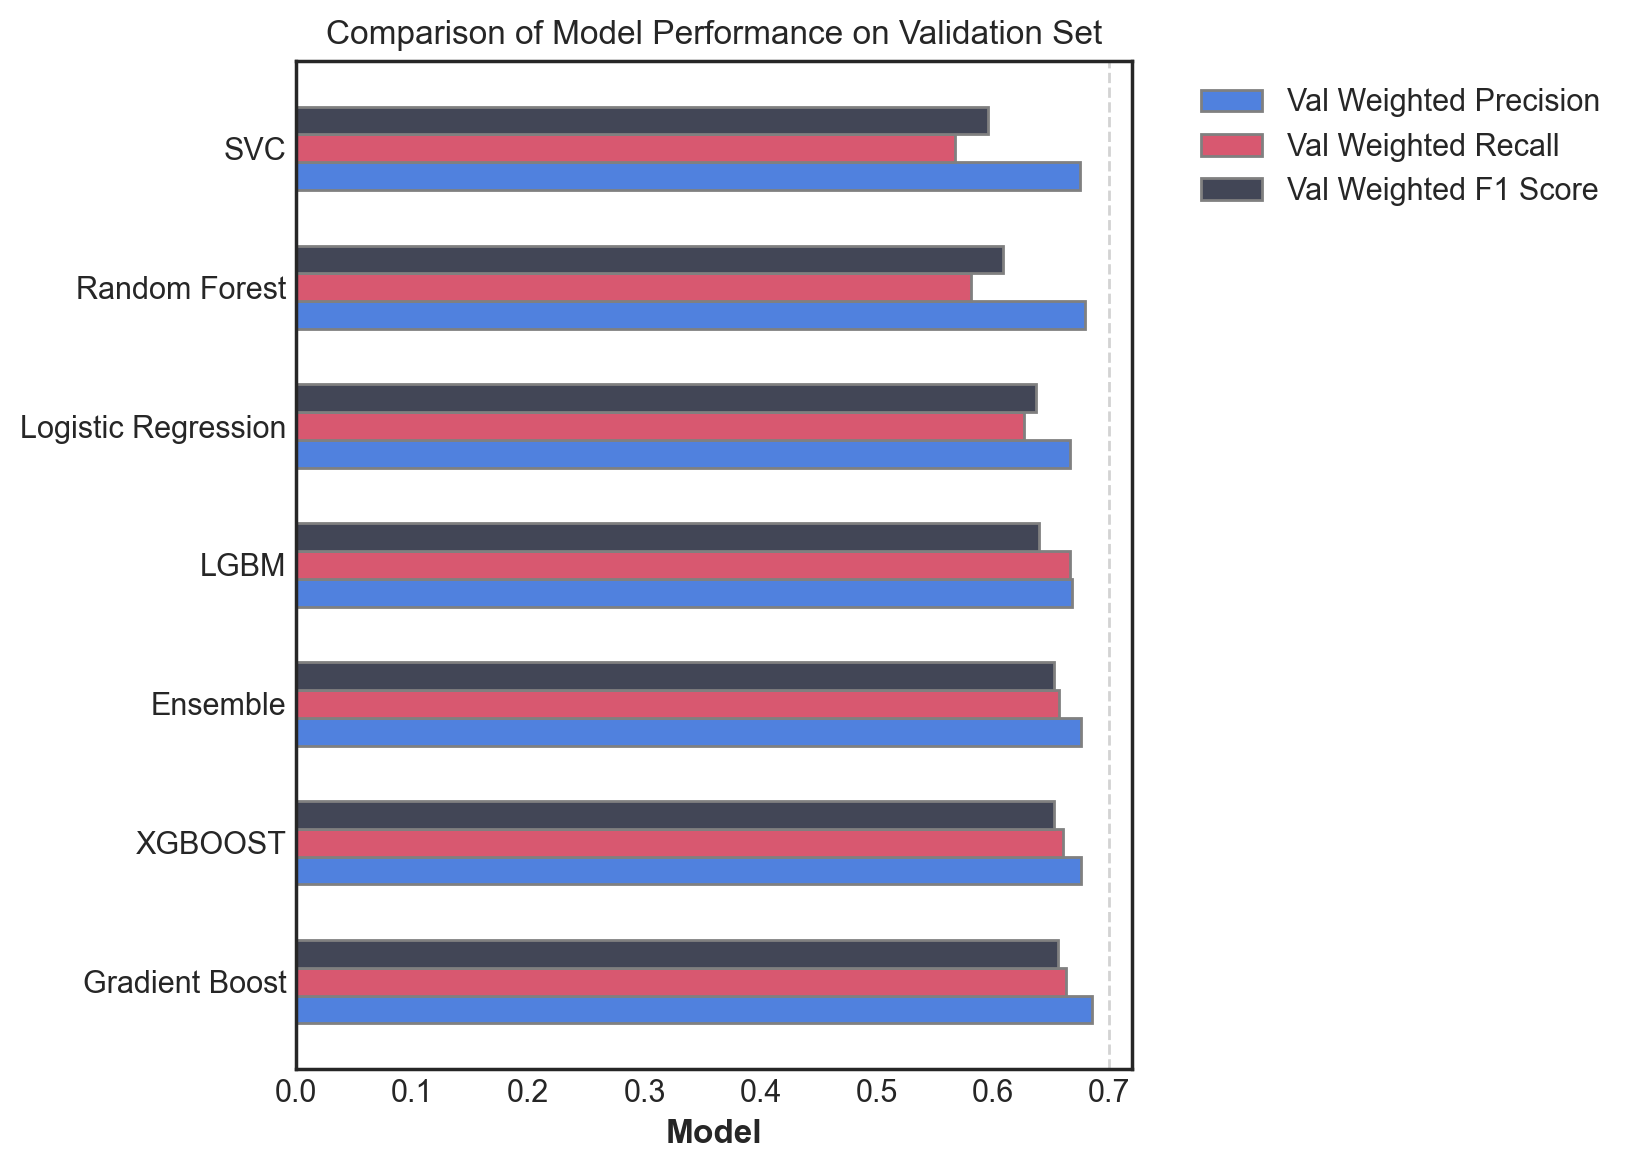

In [340]:
#Sort the DataFrame by 'Val Weighted F1 Score' in descending order
val_metrics_df = val_metrics_df.sort_values(by='Val Weighted F1 Score', ascending=False)

#Width of the bars
bar_width = 0.2

#Set the position of the bars on the y-axis
r1 = np.arange(len(val_metrics_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the bars for validation set
ax.barh(r1, val_metrics_df['Val Weighted Precision'], color='#5081DE', height=bar_width, edgecolor='grey', label='Val Weighted Precision')
ax.barh(r2, val_metrics_df['Val Weighted Recall'], color='#D85870', height=bar_width, edgecolor='grey', label='Val Weighted Recall')
ax.barh(r3, val_metrics_df['Val Weighted F1 Score'], color='#424656', height=bar_width, edgecolor='grey', label='Val Weighted F1 Score')

#Light grey ticked line at 0.65
ax.axvline(x=0.7, color='lightgrey', linestyle='dashed', linewidth=1)

#xticks on the middle of the group bars
ax.set_xlabel('Model', fontweight='bold')
ax.set_yticks([r + bar_width for r in range(len(val_metrics_df))])
ax.set_yticklabels(val_metrics_df['Model'])

#Legend
ax.legend()

#Add legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot
plt.title('Comparison of Model Performance on Validation Set')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()

<a class="anchor" id="fin">

### Final Model Selection

###### [Go back to Contents](#top)
</a>

We will select the final model based on two criteria: firstly, the model with the least amount of overfitting, indicated by the closest F1 score between the training and validation sets, since we want a model that generalizes well on unseen data. Secondly, prioritizing the model with the highest F1 score on the validation set. We choose F1 score as our primary metric because it effectively evaluates model performance in imbalanced classification problems.

In [341]:
#Calculate the differences between train and validation F1 scores
f1_diff = [abs(train - val) for train, val in zip(f1, val_f1)]

#Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Precision': precision,
    'Train Recall': recall,
    'Train F1 Score': f1,
    'Validation Precision': val_precision,
    'Validation Recall': val_recall,
    'Validation F1 Score': val_f1,
    'F1 Score Difference': f1_diff
})

#Sort the DataFrame by F1 Score Difference (ascending) and Validation F1 Score (descending)
metrics_df.sort_values(by=['F1 Score Difference', 'Validation F1 Score'], ascending=[True, False], inplace=True)

#Select the best model
best_model_name = metrics_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model_metrics = metrics_df.iloc[0]

#Print the best model and its scores
print(f"The best model is {best_model_name}")
print(f"Train F1 Score: {best_model_metrics['Train F1 Score']}")
print(f"Validation F1 Score: {best_model_metrics['Validation F1 Score']}")
print(f"F1 Score Difference: {best_model_metrics['F1 Score Difference']}")

#Display the DataFrame
metrics_df

The best model is LGBM
Train F1 Score: 0.6586270899276745
Validation F1 Score: 0.6393270017538837
F1 Score Difference: 0.019300088173790808


,Model,Train Precision,Train Recall,Train F1 Score,Validation Precision,Validation Recall,Validation F1 Score,F1 Score Difference
4,LGBM,0.690320,0.687345,0.658627,0.668566,0.666667,0.639327,0.019300
3,Gradient Boost,0.703849,0.695616,0.685426,0.685327,0.663366,0.655705,0.029722
5,Ensemble,0.699134,0.690653,0.684951,0.676164,0.656766,0.652718,0.032233
6,XGBOOST,0.701905,0.696443,0.686264,0.676182,0.660066,0.653034,0.033230
1,SVC,0.719843,0.612903,0.634695,0.675273,0.567657,0.596013,0.038682
2,Random Forest,0.717571,0.626964,0.649240,0.679779,0.580858,0.609032,0.040208
0,Logistic Regression,0.695994,0.671629,0.678521,0.666586,0.627063,0.636976,0.041545


We rather choose Gradient Boost, even if we lose a small amount in overfit this model has a higher validation f1 score that we also value

<a class="anchor" id="int">

### Final Model Interpretation

###### [Go back to Contents](#top)
</a>

In [344]:
gradient_boost_model_name = 'Gradient Boost'  # Replace with the exact name if necessary

# Filter the DataFrame for the exact model name
gradient_boost_df = metrics_df[metrics_df['Model'] == gradient_boost_model_name]

# Display the filtered DataFrame
gradient_boost_df

,Model,Train Precision,Train Recall,Train F1 Score,Validation Precision,Validation Recall,Validation F1 Score,F1 Score Difference
3,Gradient Boost,0.703849,0.695616,0.685426,0.685327,0.663366,0.655705,0.029722


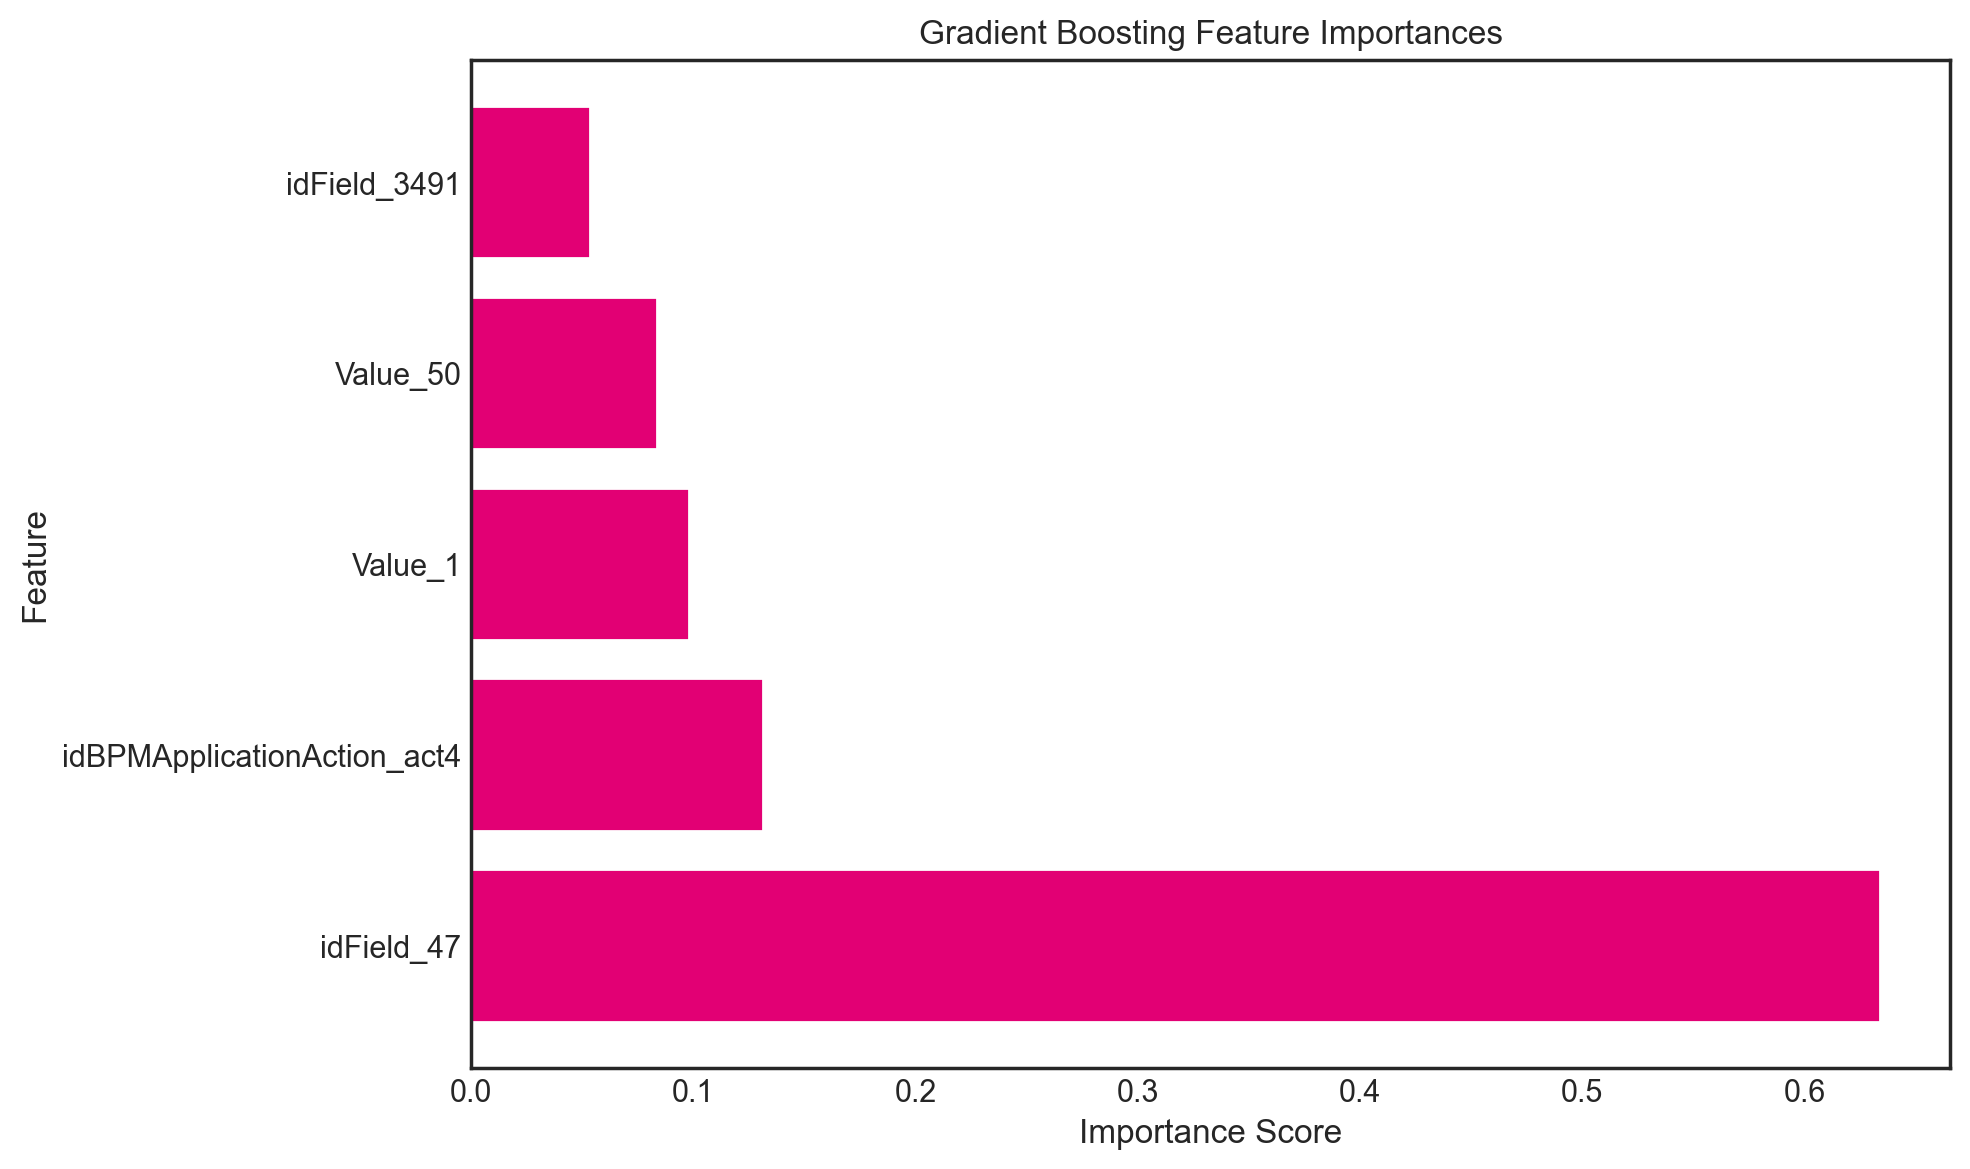

In [345]:
# Extract feature importances
importances = gbc_fit.feature_importances_
features = X_smote.columns

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="#E20074")
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importances')
plt.tight_layout()
plt.show()

The feature importance plot for the Gradient Boosting model highlights that `idField_47` is by far the most important feature, with an importance score significantly higher than the others. The next most important features are `idBPMApplicationAction_act4`, `Value_1`, `Value_50`, and `idField_3491`, but their importance scores are much lower in comparison to `idField_47`. This indicates that `idField_47` plays a crucial role in the model's predictions, while the other features have a more limited impact.